# Background

- Zaber and NMR in place and region limits set today.
- DAQ runs and used Zaber pattern setting to do a coarse 10 x 10 x 10 grid in the available space in the magnet gap.

# Imports

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [128]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
from dateutil import parser
import matplotlib.pyplot as plt
%matplotlib inline

from plotting import config_plots, datetime_plt

In [129]:
config_plots()

In [130]:
ddir = '/home/ckampa/Dropbox/LogFiles/'

In [131]:
# 6-10-21 11 x 11 x 11 (magnet trip)
# plotdir_pattern = '/home/ckampa/data/hallprobecalib_extras/plots/magnet_map/06-10-21/pattern/'
# plotdir_slow = '/home/ckampa/data/hallprobecalib_extras/plots/magnet_map/06-10-21/slow/'
# patternfile = '2021-06-10 105002.txt'
# slowfile = '2021-06-10 105000slow.txt'

In [132]:
# 6-11-21 07:51 6 x 6 x 6 (very coarse)
# plotdir_pattern = '/home/ckampa/data/hallprobecalib_extras/plots/magnet_map/06-11-21_07:51/pattern/'
# plotdir_slow = '/home/ckampa/data/hallprobecalib_extras/plots/magnet_map/06-11-21_07:51/slow/'
# patternfile = '2021-06-11 074905.txt'
# slowfile = '2021-06-11 074903slow.txt'

In [133]:
# 6-11-21 10:38 (check) 7 x 7 x 7 (limit YZ)
plotdir_pattern = '/home/ckampa/data/hallprobecalib_extras/plots/magnet_map/06-11-21_10:38/pattern/'
plotdir_slow = '/home/ckampa/data/hallprobecalib_extras/plots/magnet_map/06-11-21_10:38/slow/'
patternfile = '2021-06-11 103809.txt'
slowfile = '2021-06-11 103804slow.txt'

# Load Data

In [183]:
def load_data(file, pklname=None):
    with open(file, 'r') as f:
        firstline = f.readline().split(',')
        header = [e.strip(' ').strip('\n') for e in firstline]
    df = pd.read_csv(file, names=header, skiprows=1)
    # parse dates and set as index
    dates = [parser.parse(row.Time) for row in df.itertuples()]
    df['Datetime'] = pd.to_datetime(dates)
    df.sort_values(by=['Datetime'], inplace=True)
    df = df.set_index('Datetime')
    # calculate time since beginning in useful units
    df['seconds_delta'] = (df.index - df.index[0]).total_seconds()
    df['hours_delta'] = (df.index - df.index[0]).total_seconds()/60**2
    df['days_delta'] = (df.index - df.index[0]).total_seconds()/(24*60**2)
    # remove bad column ""
    cols = list(df.columns)
    if "" in cols:
        cols.remove("")
        df = df[cols]
    # save to pickle
    if not pklname is None:
        df.to_pickle(pklname)
    return df

In [273]:
df = load_data(ddir+patternfile)
df_slow = load_data(ddir+slowfile)

In [274]:
df

,Time,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Micron_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Micron_Y,Zaber_Meas_Encoder_Z,Zaber_Meas_Micron_Z,seconds_delta,hours_delta,days_delta
Datetime,,,,,,,,,,,,,,,,,
2021-06-11 10:39:17,6/11/2021 10:39:17 AM,192.053307,23.807050,0.0,0.0,422190.0,300000.0,1529210.0,422190.0,164917.96875,300000.0,117187.5,1529210.0,597347.65625,0.0,0.000000,0.000000
2021-06-11 10:39:32,6/11/2021 10:39:32 AM,192.053307,23.818067,0.0,0.0,422190.0,300000.0,1569210.0,422190.0,164917.96875,300000.0,117187.5,1569210.0,612972.65625,15.0,0.004167,0.000174
2021-06-11 10:39:47,6/11/2021 10:39:47 AM,192.053307,23.828900,0.0,0.0,422190.0,300000.0,1609210.0,422190.0,164917.96875,300000.0,117187.5,1609210.0,628597.65625,30.0,0.008333,0.000347
2021-06-11 10:40:03,6/11/2021 10:40:03 AM,192.053420,23.839383,0.0,0.0,422190.0,300000.0,1649210.0,422190.0,164917.96875,300000.0,117187.5,1649210.0,644222.65625,46.0,0.012778,0.000532
2021-06-11 10:40:18,6/11/2021 10:40:18 AM,192.053307,23.849517,0.0,0.0,422190.0,300000.0,1689210.0,422190.0,164917.96875,300000.0,117187.5,1689210.0,659847.65625,61.0,0.016944,0.000706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-11 12:27:12,6/11/2021 12:27:12 PM,192.052797,24.320900,0.0,0.0,554790.0,540000.0,1609210.0,554790.0,216714.84375,540000.0,210937.5,1609210.0,628597.65625,6475.0,1.798611,0.074942
2021-06-11 12:27:57,6/11/2021 12:27:57 PM,192.052740,24.321500,0.0,0.0,554790.0,540000.0,1649210.0,554790.0,216714.84375,540000.0,210937.5,1649210.0,644222.65625,6520.0,1.811111,0.075463
2021-06-11 12:28:12,6/11/2021 12:28:12 PM,192.052740,24.321650,0.0,0.0,554790.0,540000.0,1689210.0,554790.0,216714.84375,540000.0,210937.5,1689210.0,659847.65625,6535.0,1.815278,0.075637


In [275]:
[len(df[f'Zaber_Pattern_{i}'].unique()) for i in ['X', 'Y', 'Z']]

[7, 7, 7]

In [276]:
11*11*11

1331

In [277]:
df_slow

,Time,Magnet Current [A],Magnet Voltage [V],Coil 1,Coil 2,LCW in Coil1,LCW out Coil 1,LCW in Coil 2,LCW out Coil 2,Yoke (near pole),...,NMR [FFT],Zaber_Meas_Encoder_X,Zaber_Meas_Micron_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Micron_Y,Zaber_Meas_Encoder_Z,Zaber_Meas_Micron_Z,seconds_delta,hours_delta,days_delta
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-06-11 10:38:49,6/11/2021 10:38:49 AM,192.053137,23.786400,37.868198,37.735058,30.003470,30.716783,29.708422,33.582046,23.527044,...,0.0,164917.96875,422190.0,117187.5,300000.0,597347.65625,1529210.0,0.0,0.000000,0.000000
2021-06-11 10:47:58,6/11/2021 10:47:58 AM,192.053250,24.064517,40.848919,40.667927,29.761360,31.068247,29.836613,34.781254,23.623230,...,0.0,164917.96875,422190.0,179687.5,460000.0,612972.65625,1569210.0,549.0,0.152500,0.006354
2021-06-11 10:56:16,6/11/2021 10:56:16 AM,192.053080,24.168217,42.031895,41.839077,29.508358,31.023563,30.391378,35.206070,23.706936,...,0.0,173550.78125,444290.0,117187.5,300000.0,691097.65625,1769210.0,1047.0,0.290833,0.012118
2021-06-11 11:04:22,6/11/2021 11:04:22 AM,192.053080,24.212983,42.487049,42.311741,29.510820,31.073902,30.224541,35.380314,23.805525,...,0.0,173550.78125,444290.0,179687.5,460000.0,644222.65625,1649210.0,1533.0,0.425833,0.017743
2021-06-11 11:12:54,6/11/2021 11:12:54 AM,192.053137,24.236217,42.761990,42.582260,29.538408,31.159527,30.330000,35.522572,23.918077,...,0.0,182183.59375,466390.0,132812.5,340000.0,612972.65625,1569210.0,2045.0,0.568056,0.023669
2021-06-11 11:21:06,6/11/2021 11:21:06 AM,192.053080,24.245517,42.806652,42.678539,29.548237,31.203817,30.132912,35.524860,23.990545,...,0.0,182183.59375,466390.0,179687.5,460000.0,691097.65625,1769210.0,2537.0,0.704722,0.029363
2021-06-11 11:29:39,6/11/2021 11:29:39 AM,192.053023,24.253217,42.932915,42.753647,29.599123,31.235933,30.480276,35.641556,24.098286,...,0.0,190816.40625,488490.0,132812.5,340000.0,659847.65625,1689210.0,3050.0,0.847222,0.035301
2021-06-11 11:37:51,6/11/2021 11:37:51 AM,192.052910,24.261550,42.949917,42.871010,29.757795,31.392832,30.255957,35.744343,24.157347,...,0.0,190816.40625,488490.0,195312.5,500000.0,612972.65625,1569210.0,3542.0,0.983889,0.040995
2021-06-11 11:46:19,6/11/2021 11:46:19 AM,192.053080,24.273833,43.142147,42.933785,29.866882,31.496199,30.560114,35.906879,24.261103,...,0.0,199449.21875,510590.0,148437.5,380000.0,597347.65625,1529210.0,4050.0,1.125000,0.046875


# Plotting Functions

## Planes of NMR Data

In [278]:
def plot_xplane(df, xval, plotfile=None):
#     mm = 'Encoder' # old
    mm = 'Micron' # new
    xmin = df[f'Zaber_Meas_{mm}_X'].min()
    df_ = df.query(f'`Zaber_Pattern_X` == {xval}').copy()
    x_mm = df_[f'Zaber_Meas_{mm}_X'].values[0]
    ymin = df_[f'Zaber_Meas_{mm}_Y'].min()
    zmin = -df_[f'Zaber_Meas_{mm}_Z'].max()
    # plot
    fig, ax = plt.subplots()
    sc = ax.scatter(1e-3*(df_[f'Zaber_Meas_{mm}_Y']-ymin), 1e-3*(-df_[f'Zaber_Meas_{mm}_Z']+zmin),
                    c=df_['NMR [T]'], s=25)
    cb = fig.colorbar(sc, label='NMR [T]')
    ax.set_xlabel('Zaber Y [mm]')
    ax.set_ylabel('Zaber Z [mm]')
    fig.suptitle(f'Zaber X = {1e-3*(x_mm - xmin)} [mm] = {xval} [ADC]')
#     fig.suptitle(f'Zaber Encoder X = {xval} [ADC]')
    #ax.set_facecolor('white')
    if not plotfile is None:
        fig.savefig(plotfile+'.pdf', facecolor='white', transparent=False)
        fig.savefig(plotfile+'.png', facecolor='white', transparent=False)
    return fig, ax

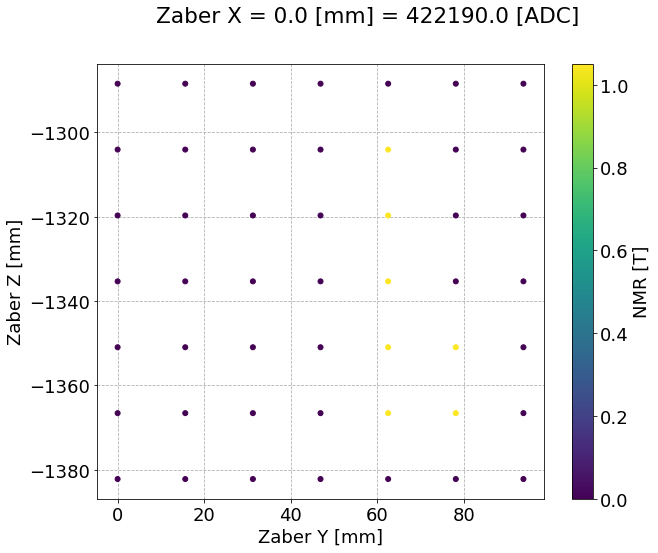

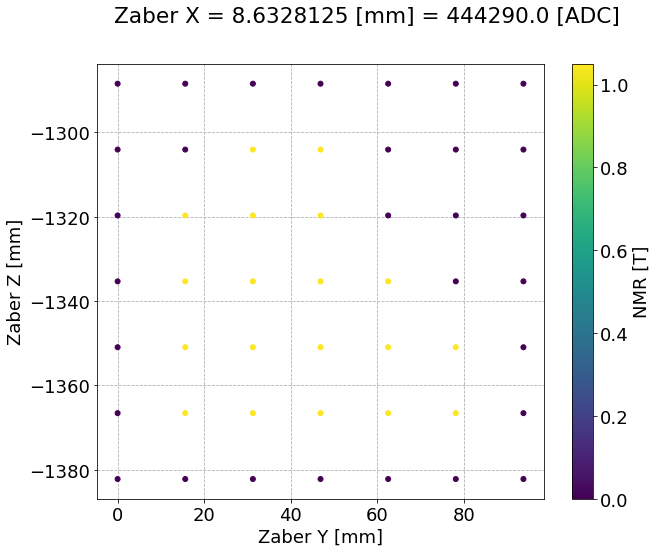

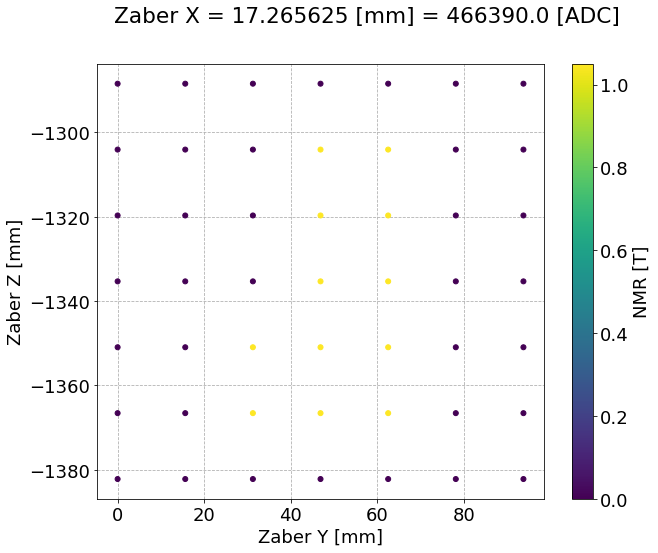

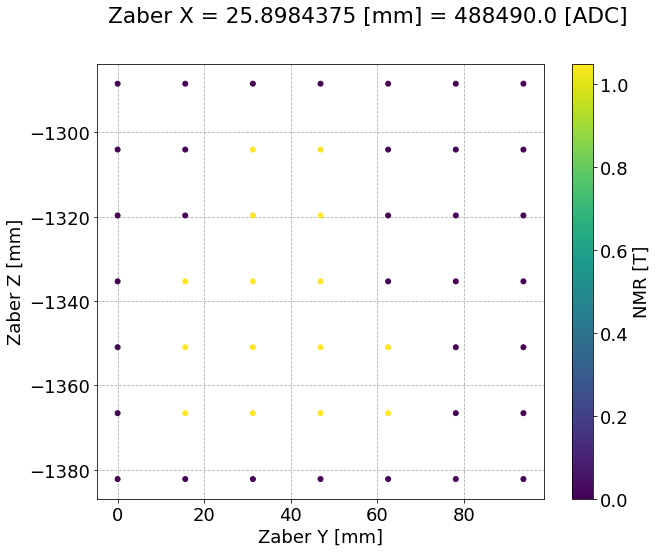

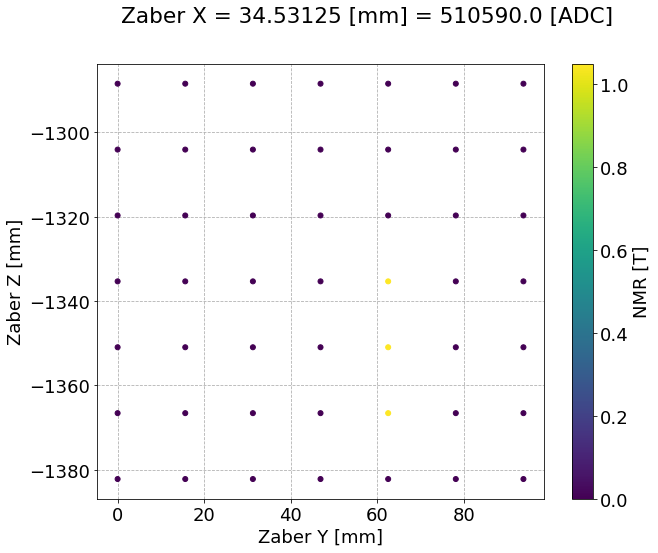

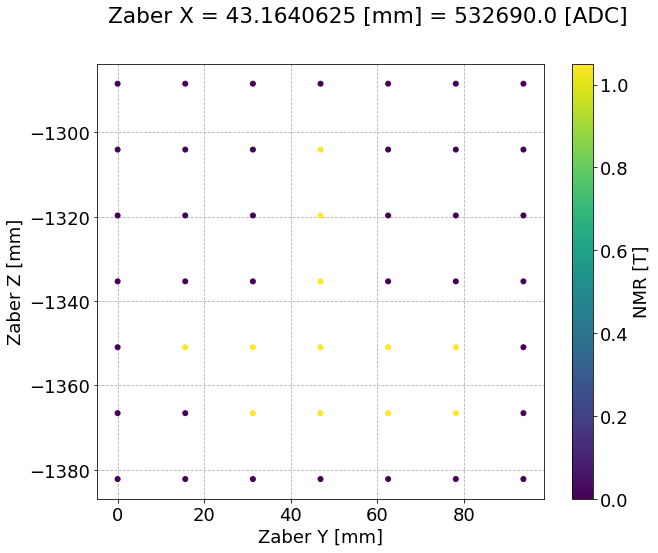

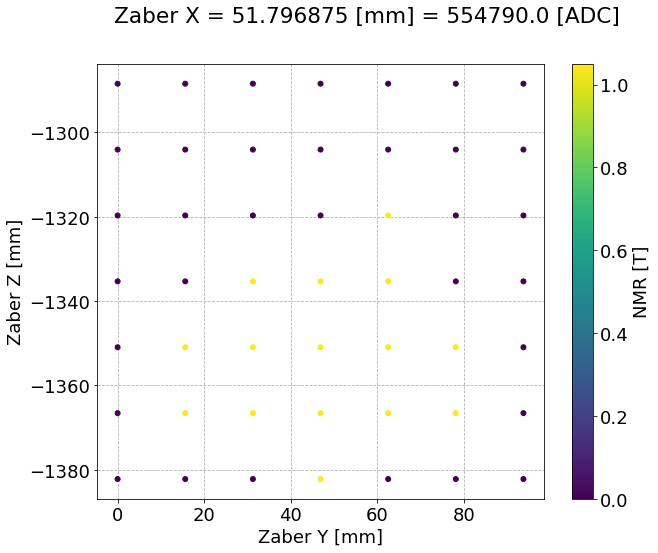

In [279]:
for xval in df['Zaber_Pattern_X'].unique():
    fig, ax = plot_xplane(df, xval, f'{plotdir_pattern}xslices/NMR_vs_Z_vs_Y_{int(xval):d}')

In [280]:
df[df['NMR [T]'] > 0.7]

,Time,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Micron_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Micron_Y,Zaber_Meas_Encoder_Z,Zaber_Meas_Micron_Z,seconds_delta,hours_delta,days_delta
Datetime,,,,,,,,,,,,,,,,,
2021-06-11 10:48:11,6/11/2021 10:48:11 AM,192.053477,24.068517,1.050127,0.0,422190.0,460000.0,1569210.0,422190.0,164917.96875,460000.0,179687.5,1569210.0,612972.65625,534.0,0.148333,0.006181
2021-06-11 10:48:27,6/11/2021 10:48:27 AM,192.053420,24.073317,1.050010,0.0,422190.0,460000.0,1609210.0,422190.0,164917.96875,460000.0,179687.5,1609210.0,628597.65625,550.0,0.152778,0.006366
2021-06-11 10:48:43,6/11/2021 10:48:43 AM,192.053420,24.078067,1.049981,0.0,422190.0,460000.0,1649210.0,422190.0,164917.96875,460000.0,179687.5,1649210.0,644222.65625,566.0,0.157222,0.006551
2021-06-11 10:48:59,6/11/2021 10:48:59 AM,192.053420,24.082433,1.049994,0.0,422190.0,460000.0,1689210.0,422190.0,164917.96875,460000.0,179687.5,1689210.0,659847.65625,582.0,0.161667,0.006736
2021-06-11 10:49:15,6/11/2021 10:49:15 AM,192.053250,24.086883,1.050145,0.0,422190.0,460000.0,1729210.0,422190.0,164917.96875,460000.0,179687.5,1729210.0,675472.65625,598.0,0.166111,0.006921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-11 12:23:25,6/11/2021 12:23:25 PM,192.053023,24.318067,1.049846,0.0,554790.0,460000.0,1649210.0,554790.0,216714.84375,460000.0,179687.5,1649210.0,644222.65625,6248.0,1.735556,0.072315
2021-06-11 12:23:42,6/11/2021 12:23:42 PM,192.052797,24.318250,1.049854,0.0,554790.0,460000.0,1689210.0,554790.0,216714.84375,460000.0,179687.5,1689210.0,659847.65625,6265.0,1.740278,0.072512
2021-06-11 12:23:58,6/11/2021 12:23:58 PM,192.052797,24.318433,1.049871,0.0,554790.0,460000.0,1729210.0,554790.0,216714.84375,460000.0,179687.5,1729210.0,675472.65625,6281.0,1.744722,0.072697


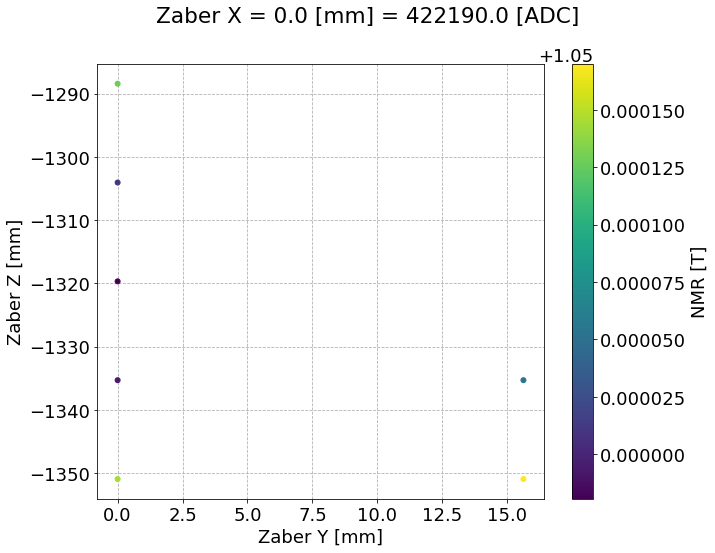

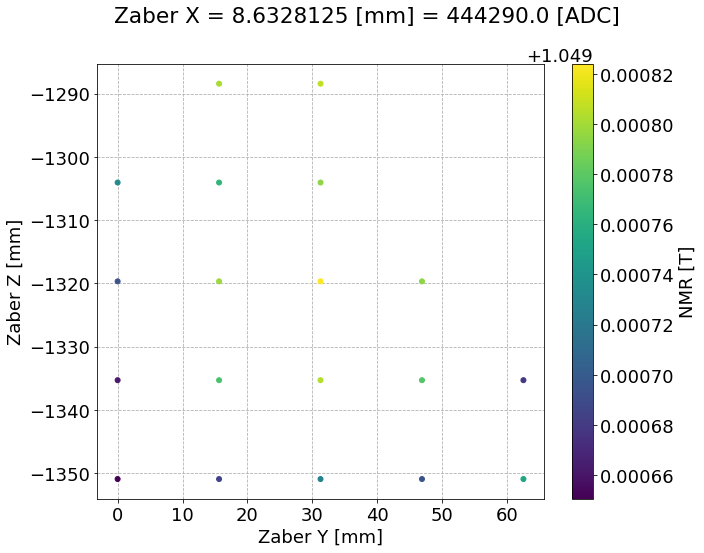

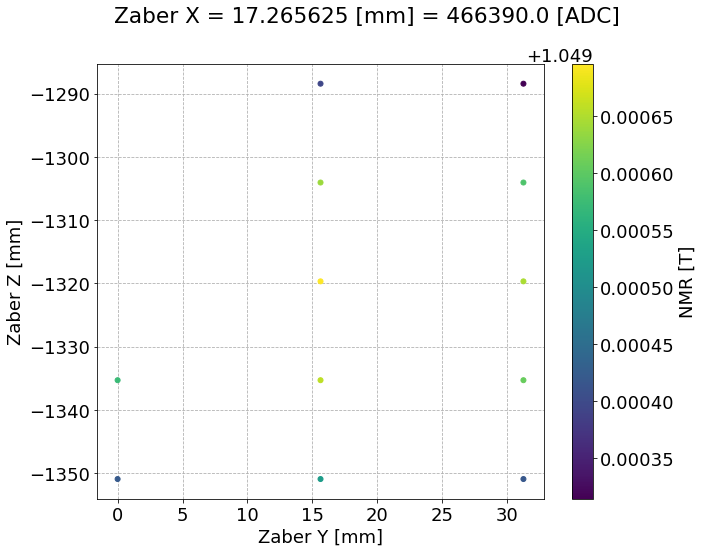

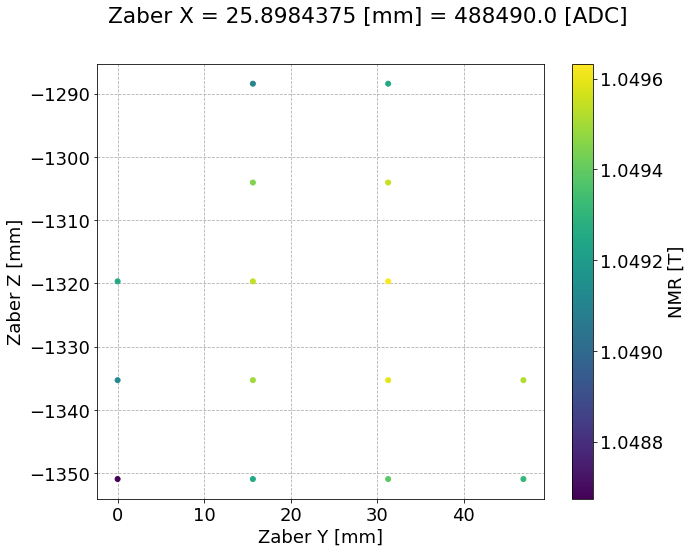

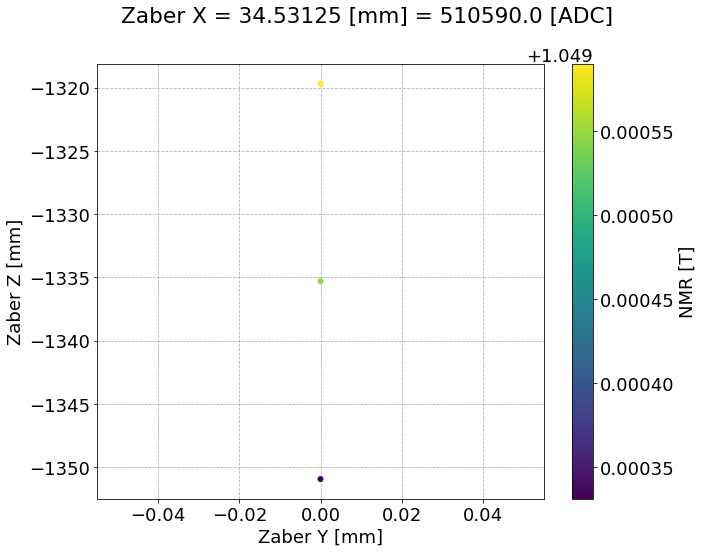

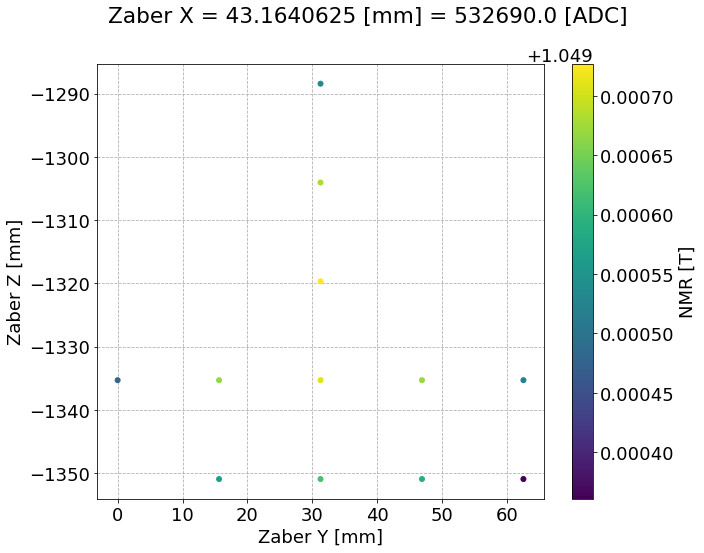

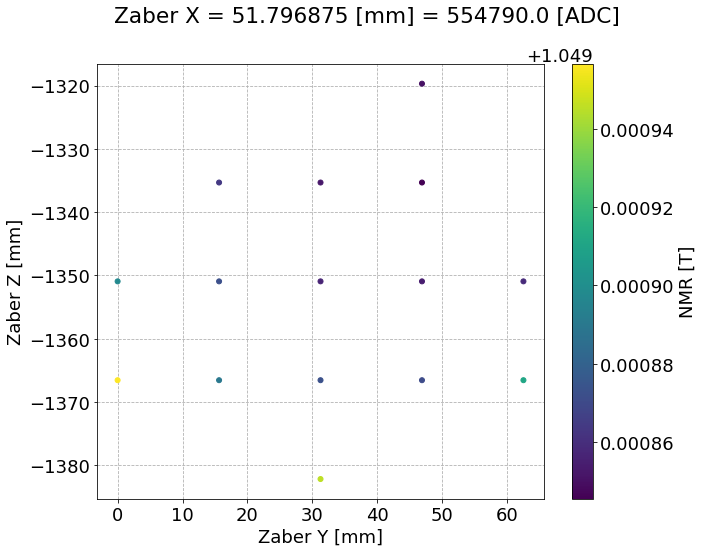

In [281]:
df_ = df[df['NMR [T]'] > 0.7]
for xval in df_['Zaber_Pattern_X'].unique():
    fig, ax = plot_xplane(df_, xval, f'{plotdir_pattern}xslices/NMR-meas_vs_Z_vs_Y_{int(xval):d}')

## Time Series Plots

In [192]:
def plot_y_vs_time(df, ycol, s=5, query_str=None, plotfile=None):
    if not query_str is None:
        df_ = df.query(query_str).copy()
    else:
        df_ = df.copy()
    # plot
    #fig, ax = plt.subplots()
    fig = plt.figure()
    ax = fig.add_axes([0.15, 0.2, 0.8, 0.75])
    ax = datetime_plt(ax=ax, x_dt=df.index, y=df[ycol], s=s, label=ycol, nmaj=8)
    ax.set_xlabel('Datetime [MM-DD HH:MM]')
    ax.set_ylabel(ycol)
#     fig.suptitle(f'Zaber X = {1e-3*(x_mm - xmin)} [mm] = {xval} [ADC]')
#     fig.suptitle(f'Zaber Encoder X = {xval} [ADC]')
    #ax.set_facecolor('white')
    #fig.tight_layout()
    if not plotfile is None:
        fig.savefig(plotfile+'.pdf', facecolor='white', transparent=False)
        fig.savefig(plotfile+'.png', facecolor='white', transparent=False)
    return fig, ax

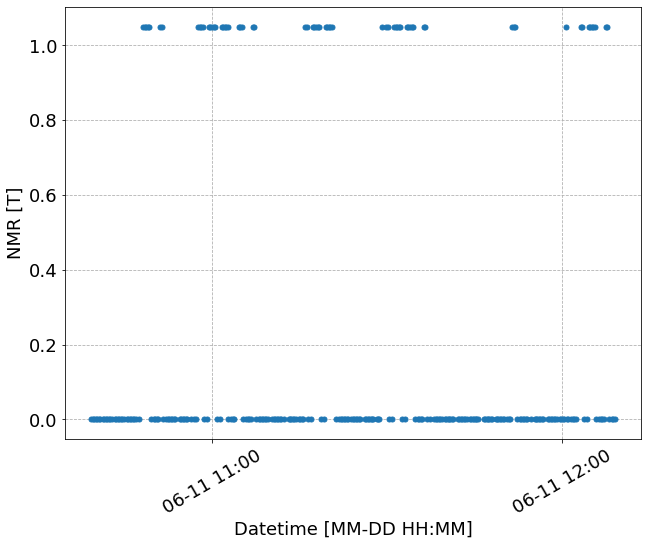

In [193]:
ycol = 'NMR [T]'
fig, ax = plot_y_vs_time(df, ycol, plotfile=plotdir_pattern+f'time/{ycol}_vs_Datetime')

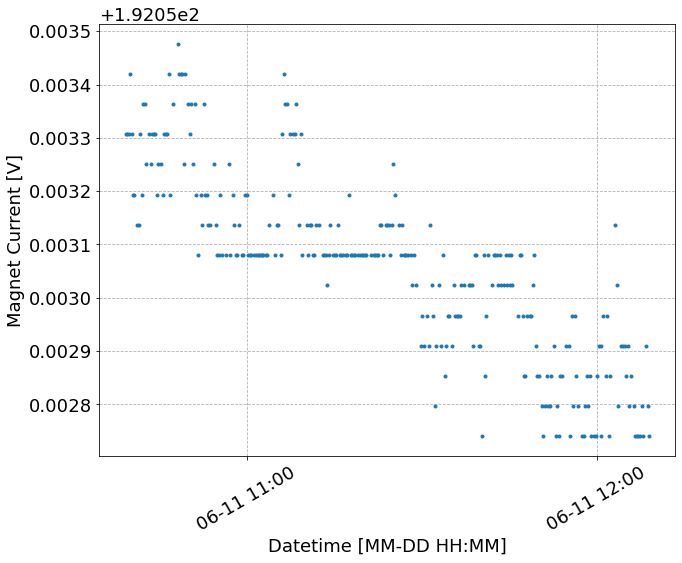

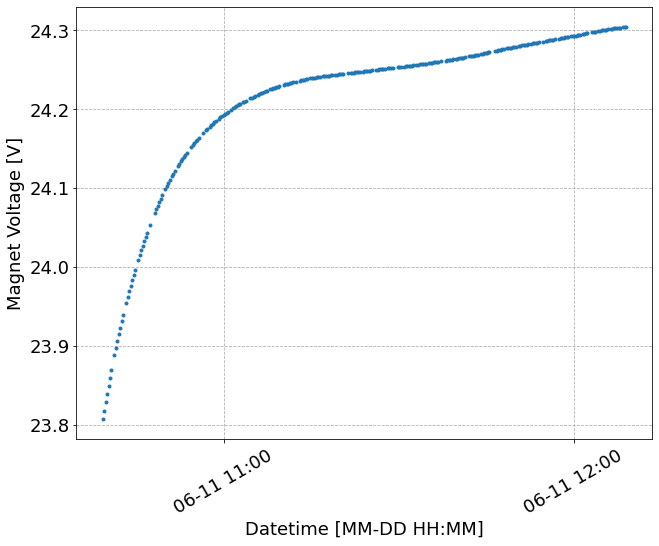

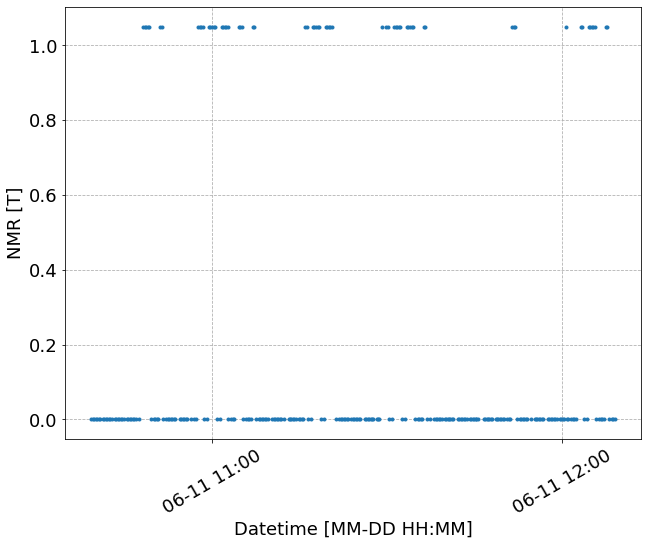

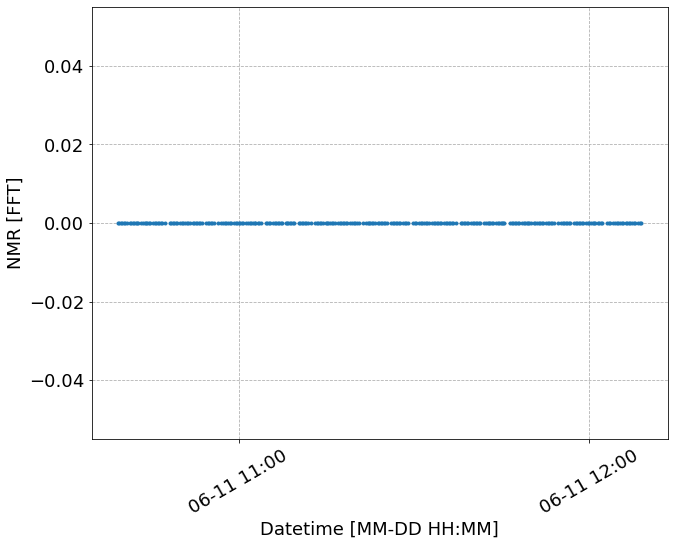

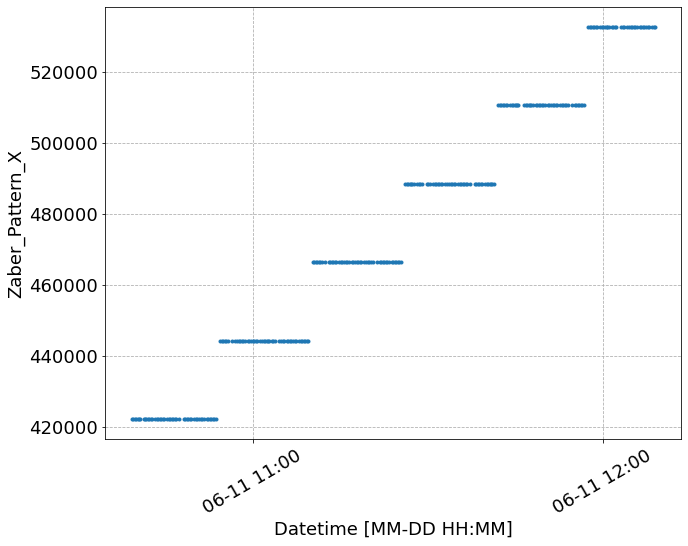

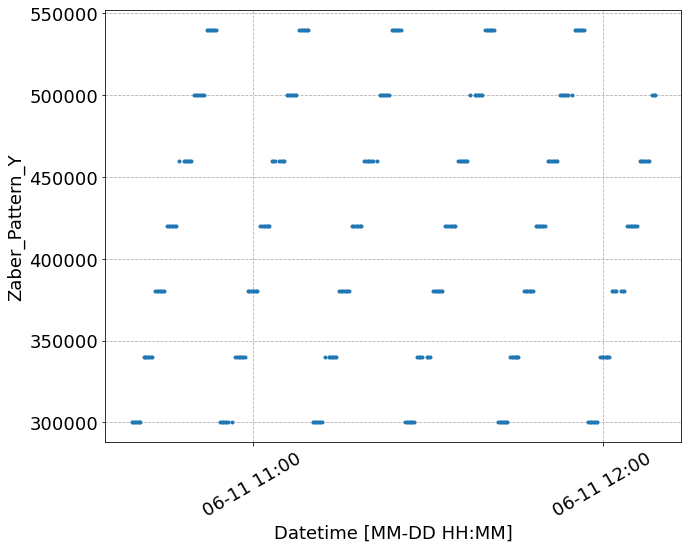

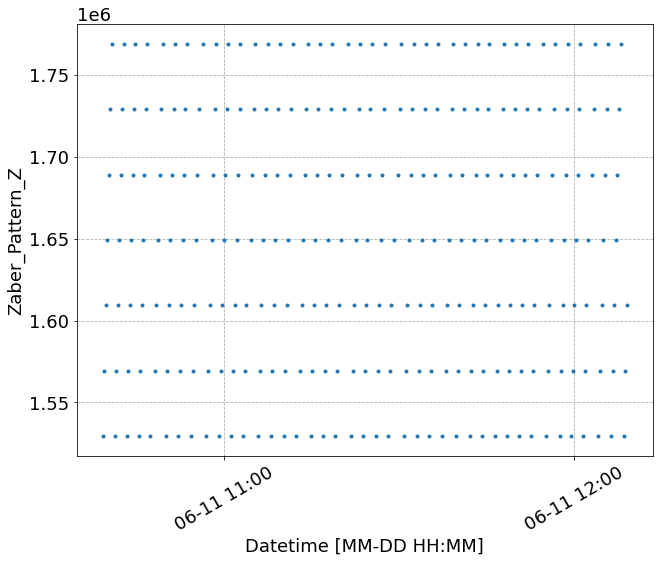

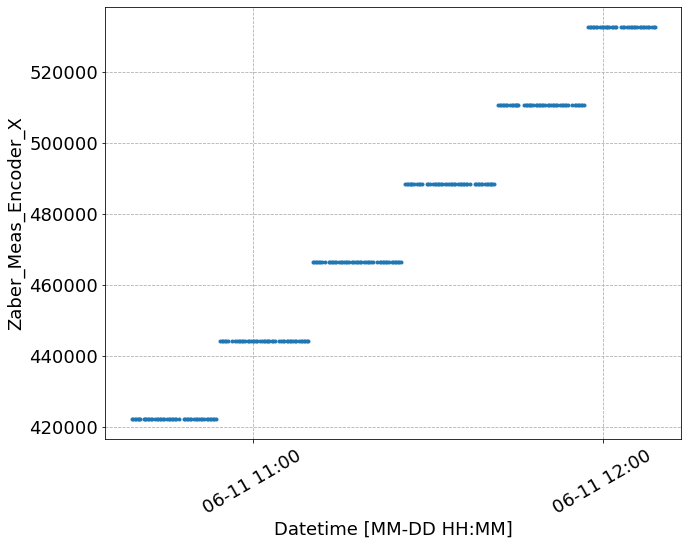

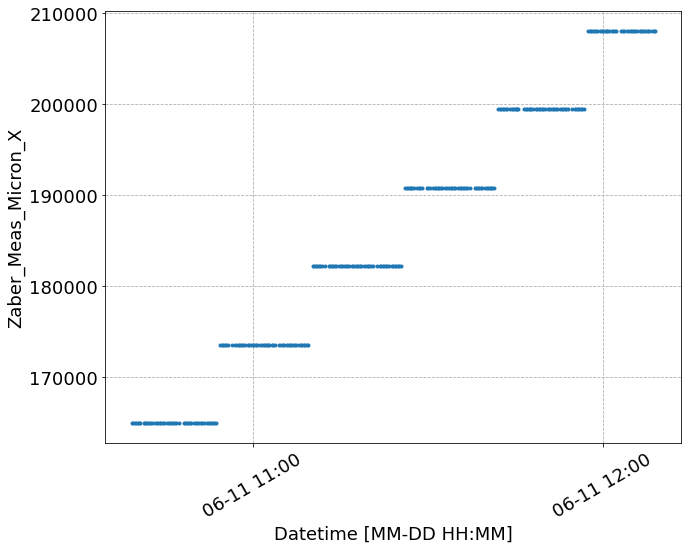

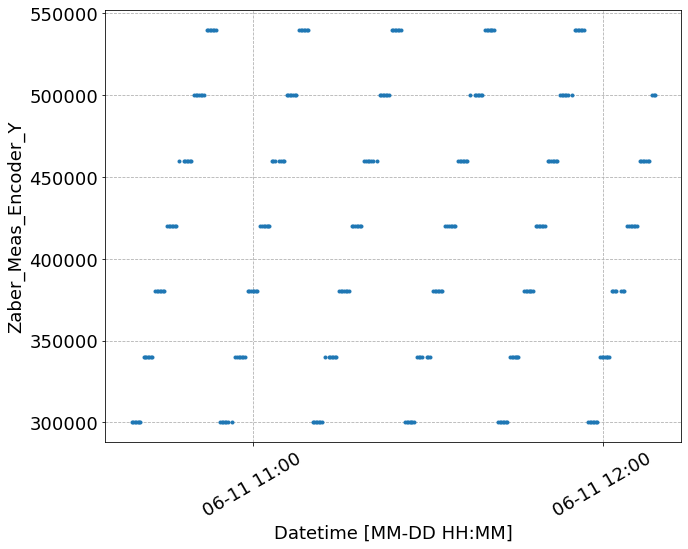

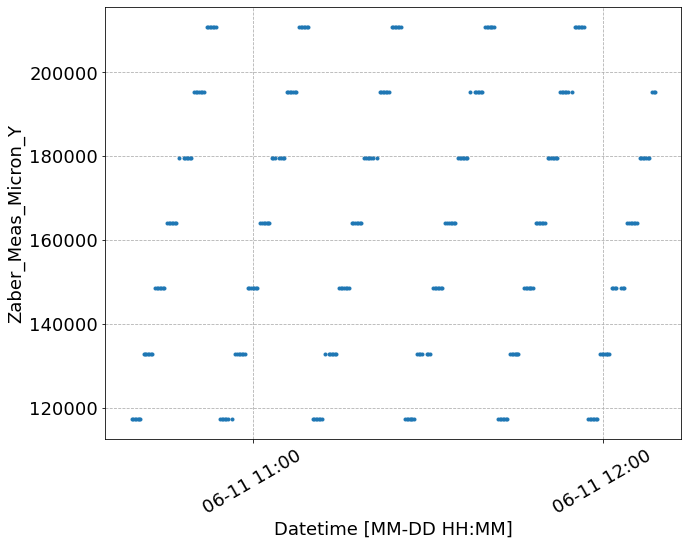

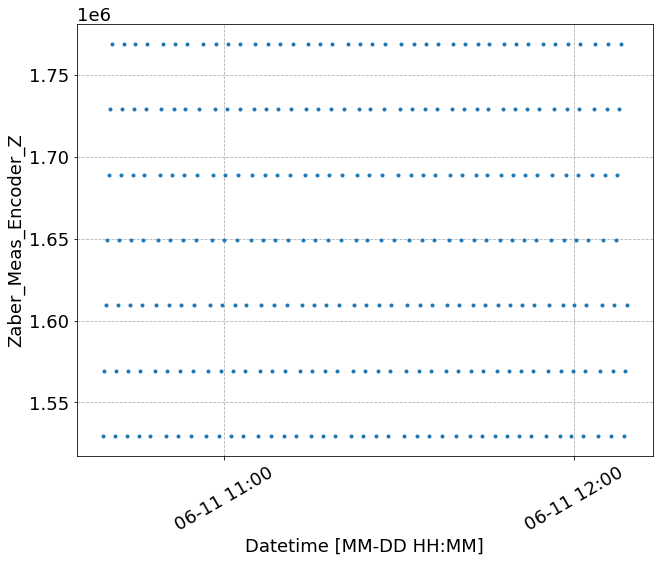

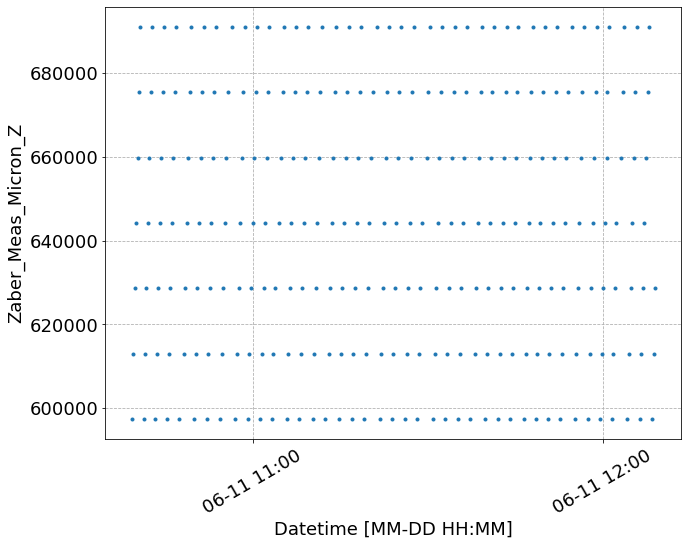

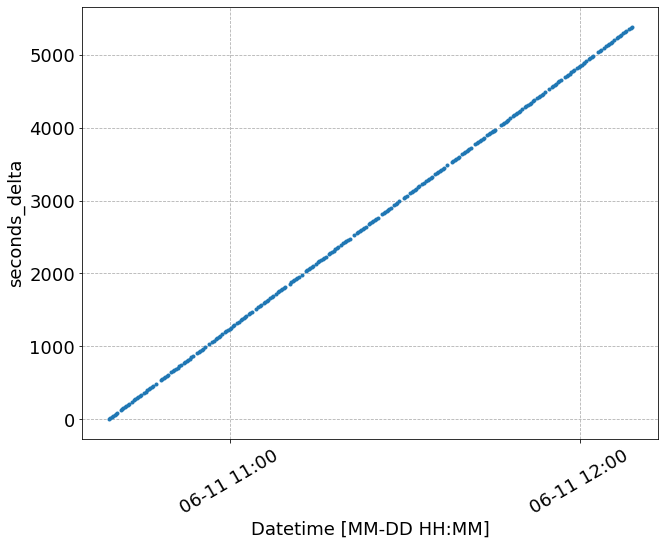

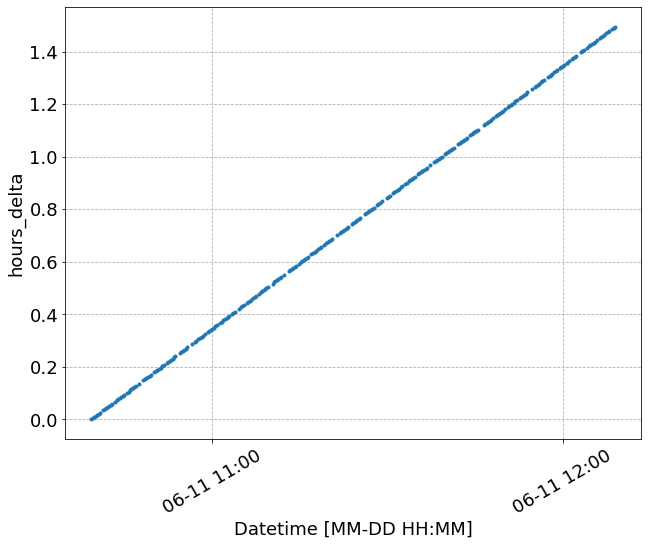

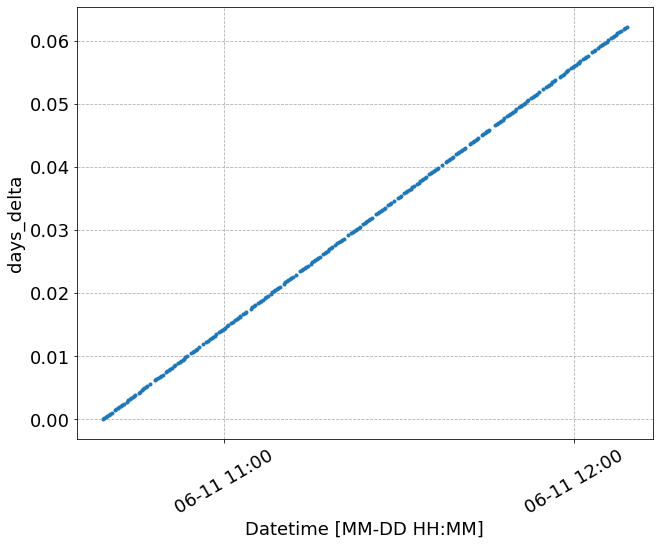

In [194]:
for ycol in df.columns:
    if is_numeric_dtype(df[ycol]):
        fig, ax = plot_y_vs_time(df, ycol, 3, plotfile=plotdir_pattern+f'time/{ycol}_vs_Datetime')

<ipython-input-192-4c70ed8ba64b>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


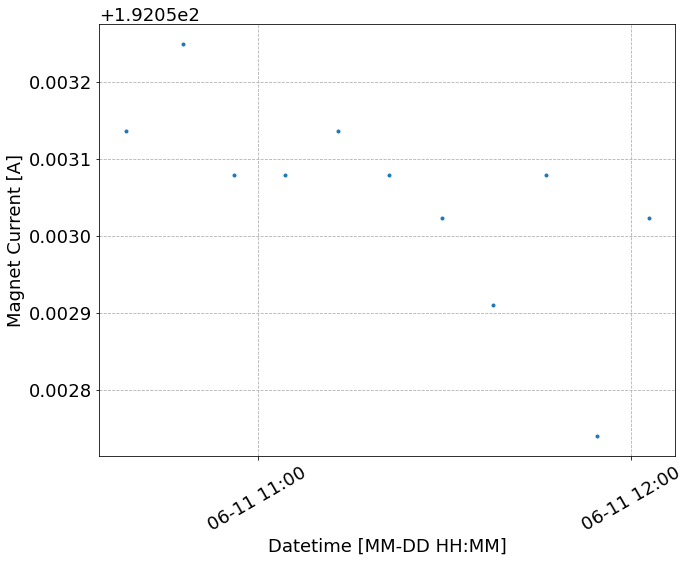

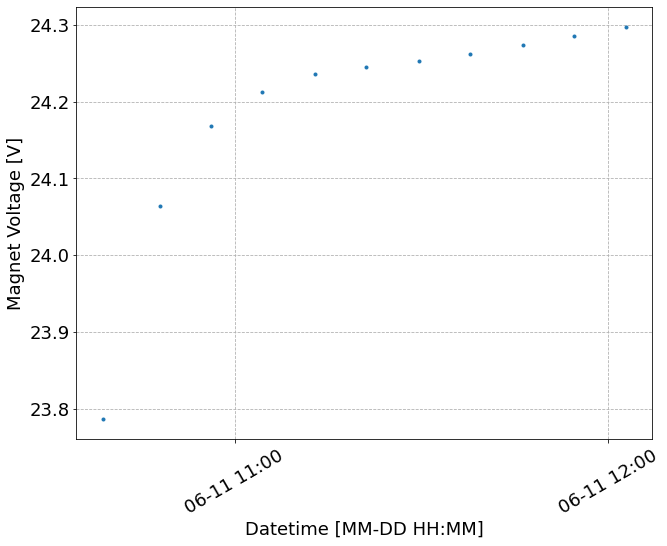

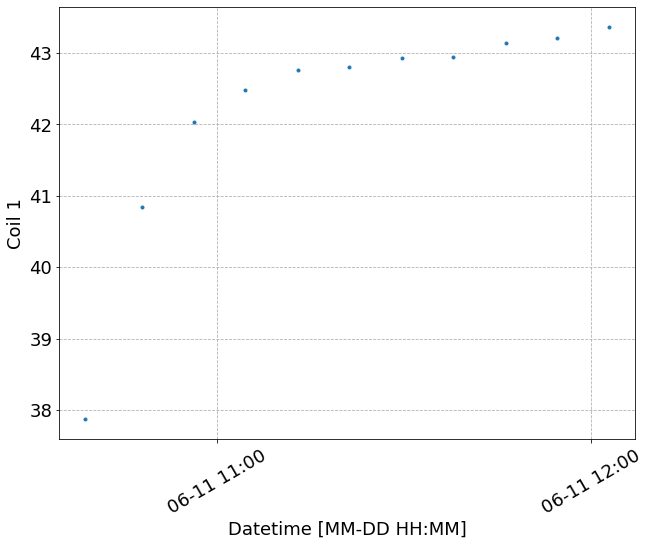

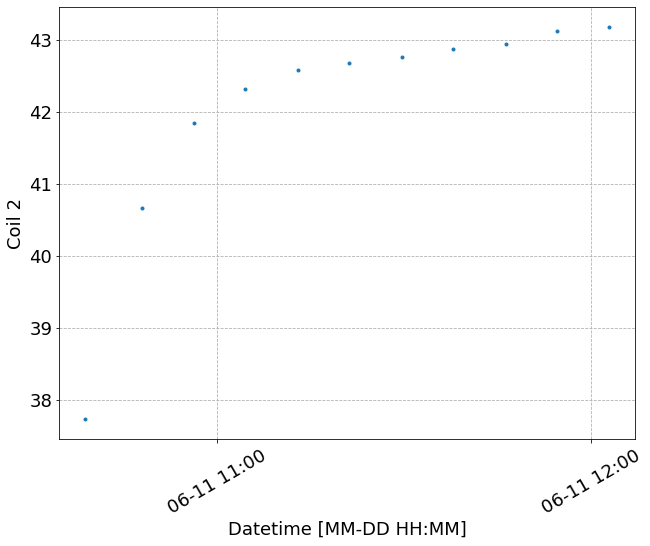

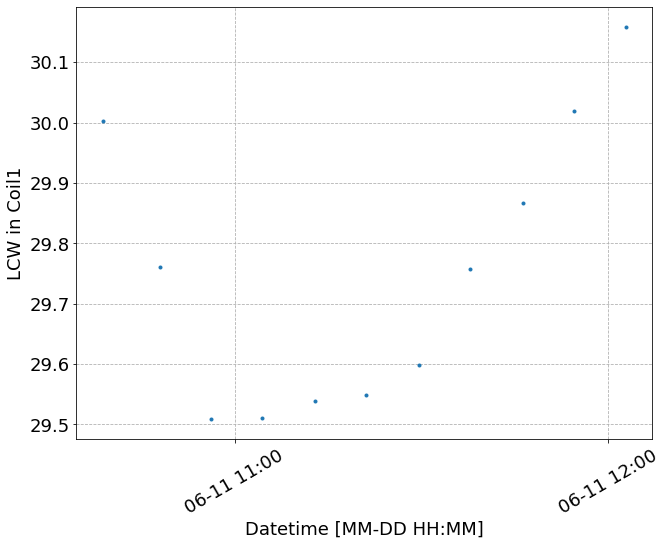

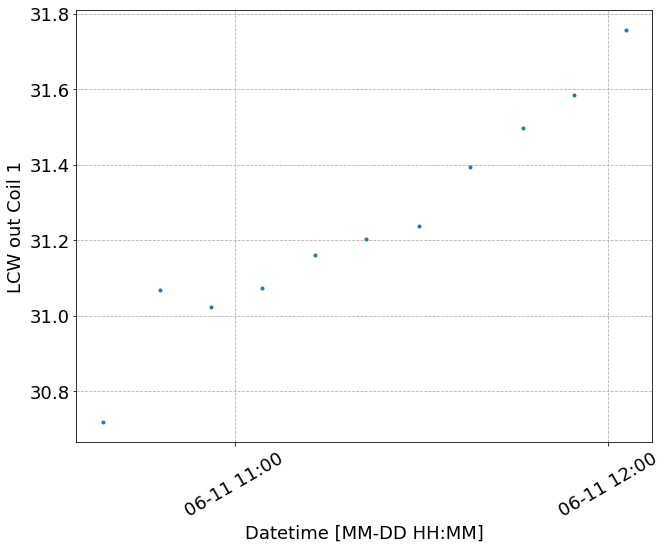

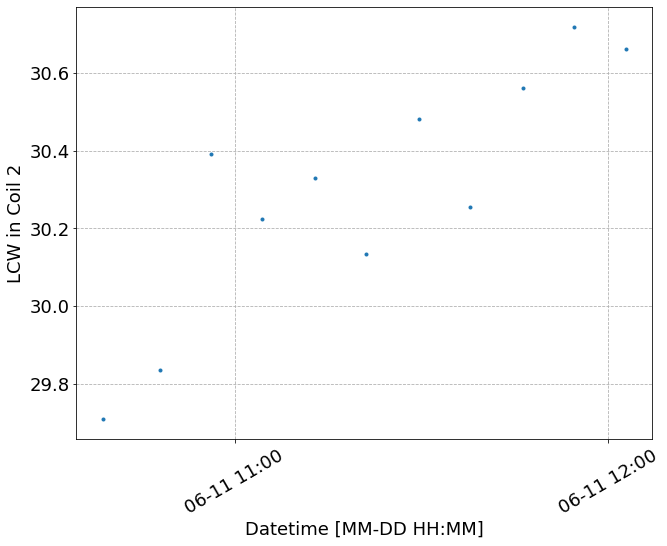

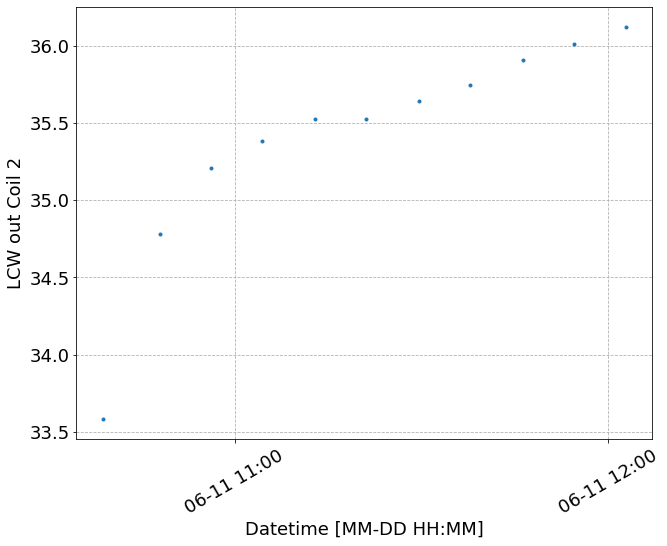

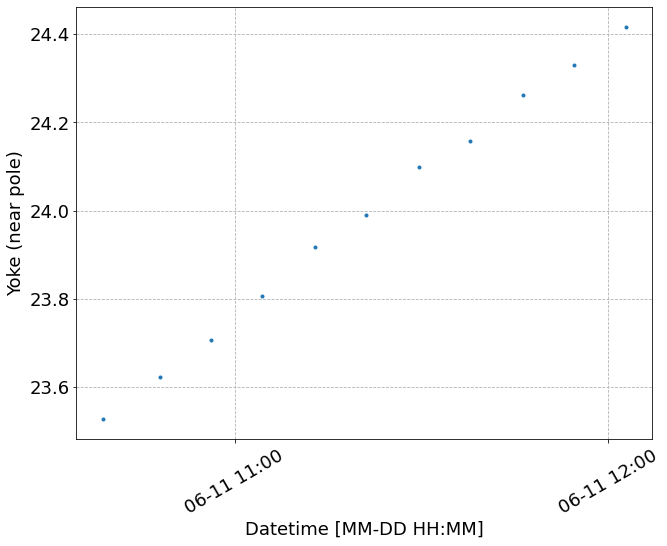

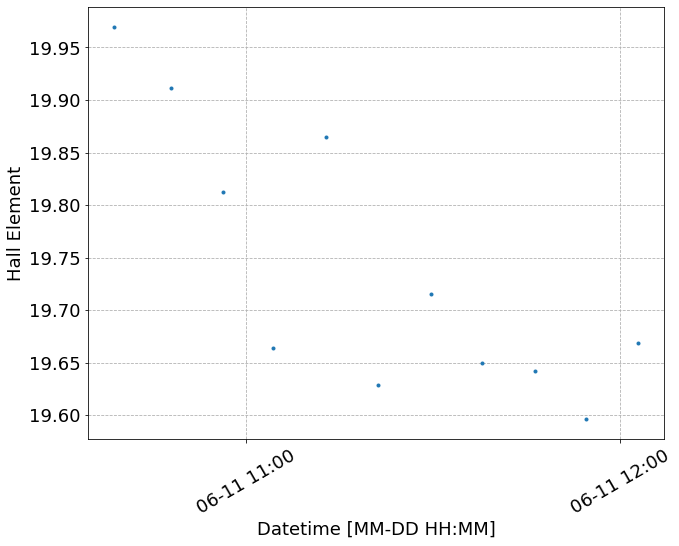

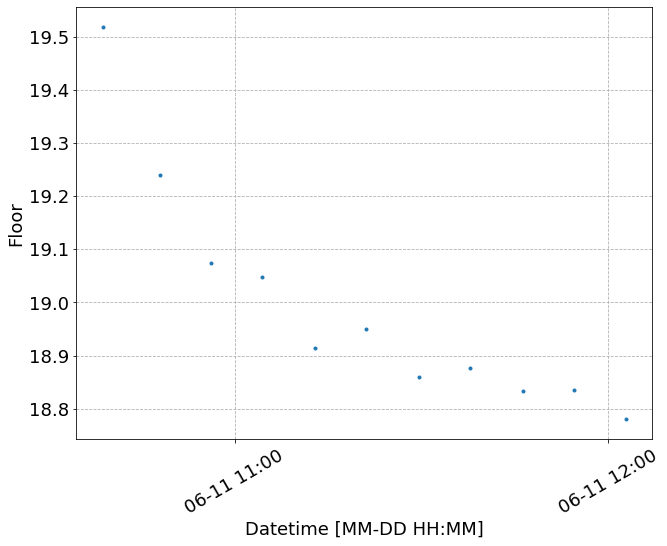

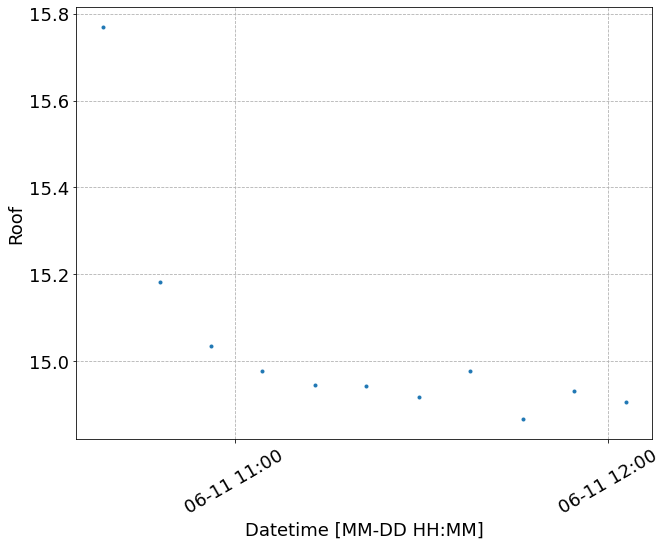

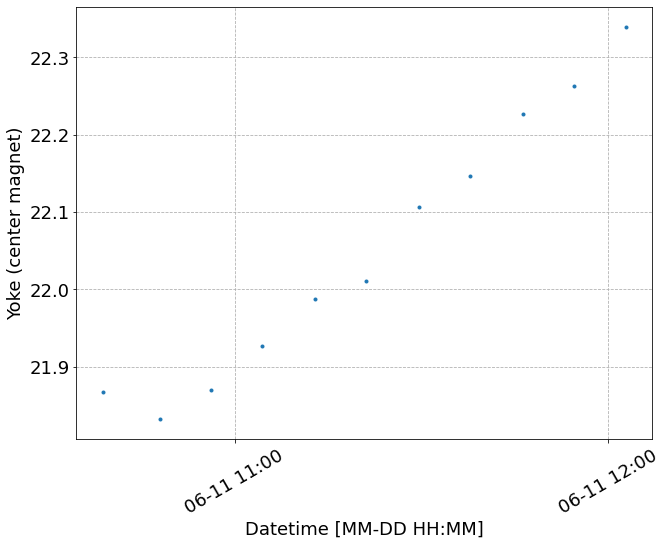

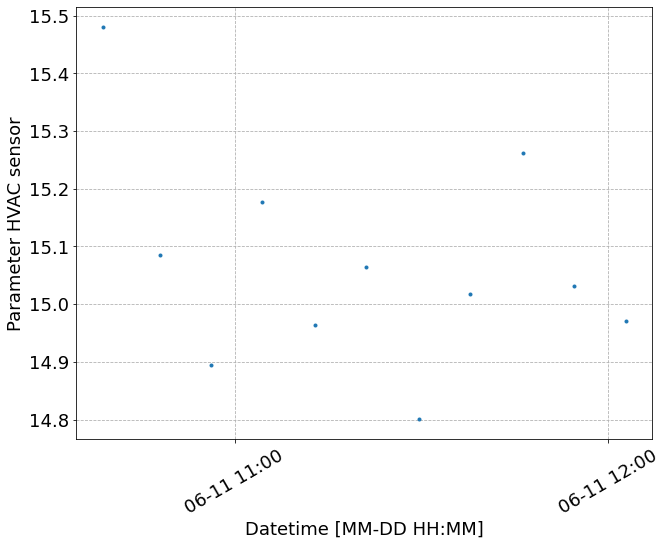

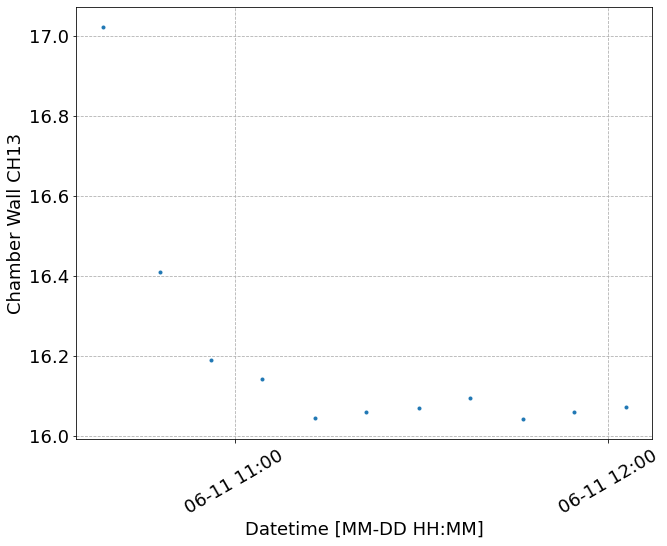

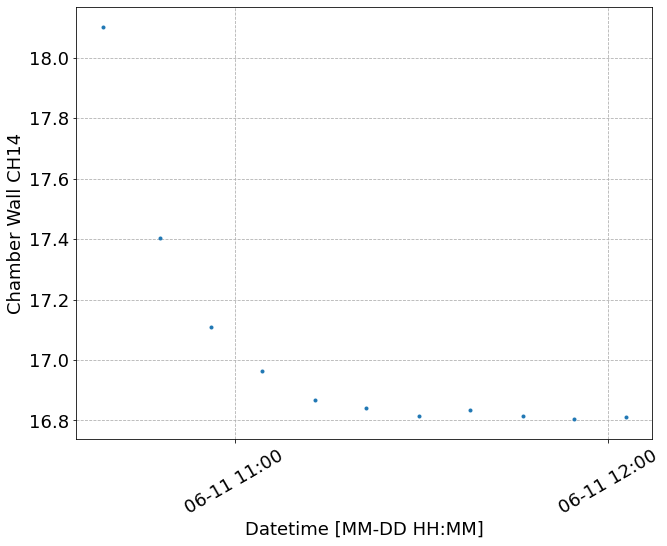

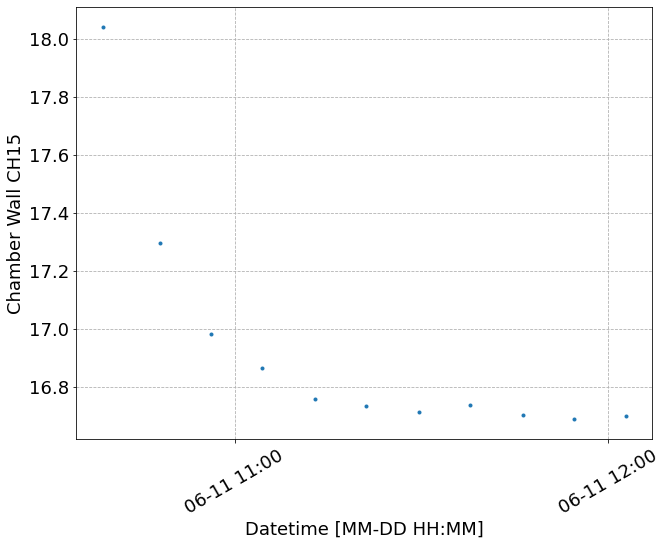

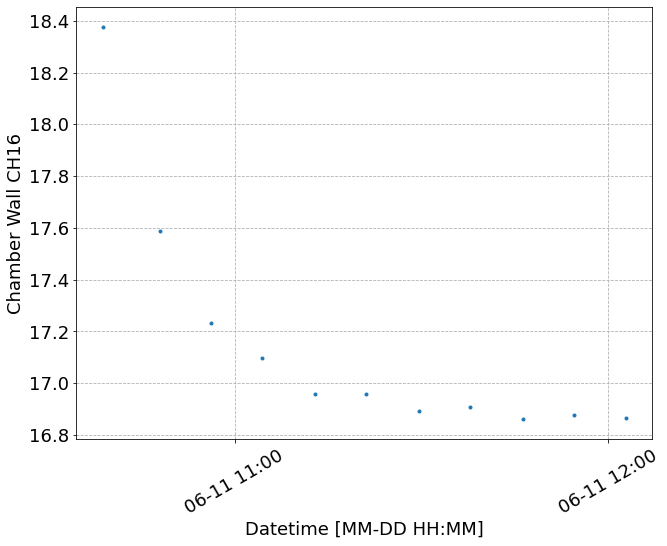

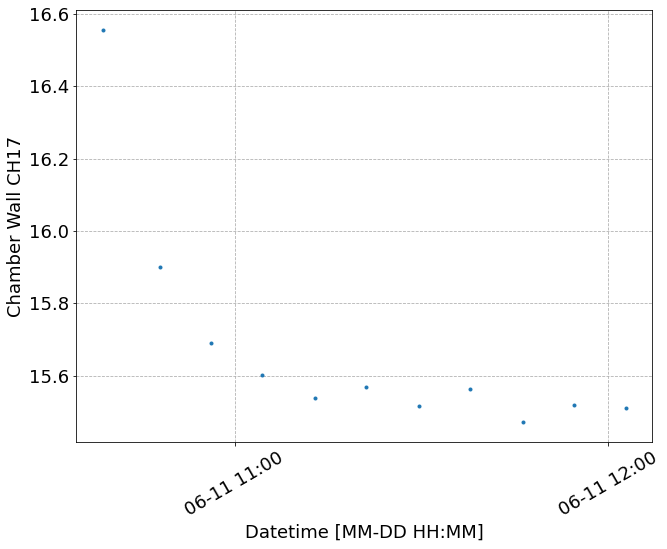

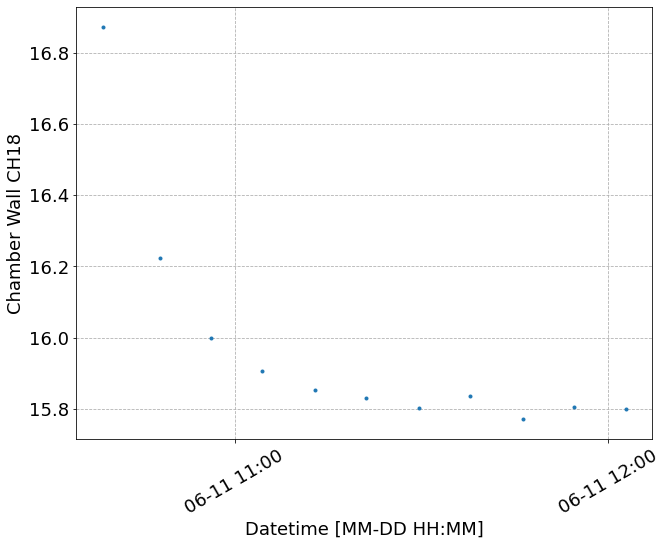

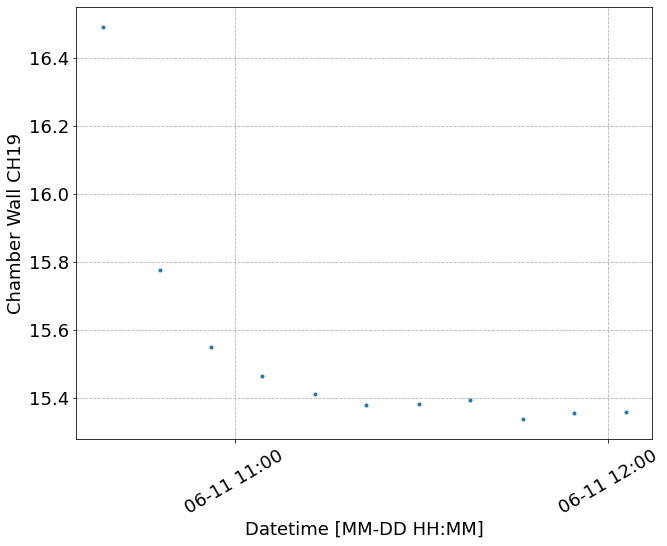

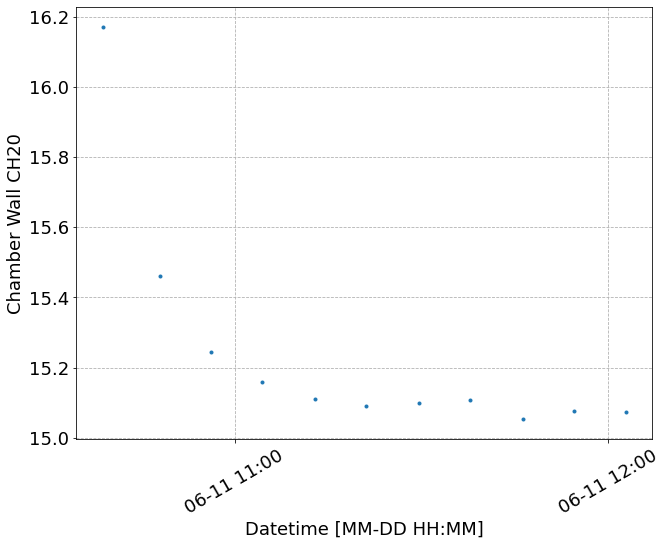

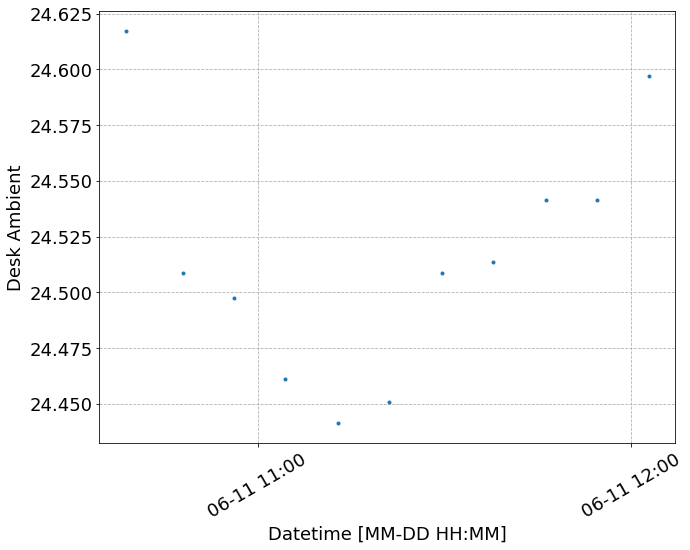

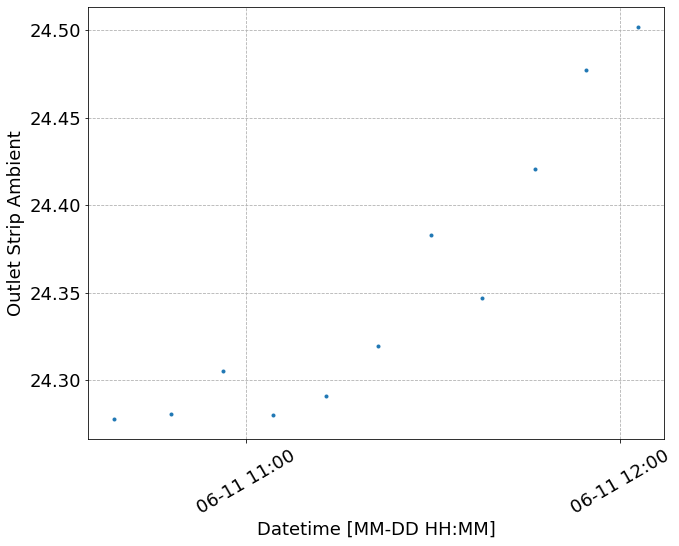

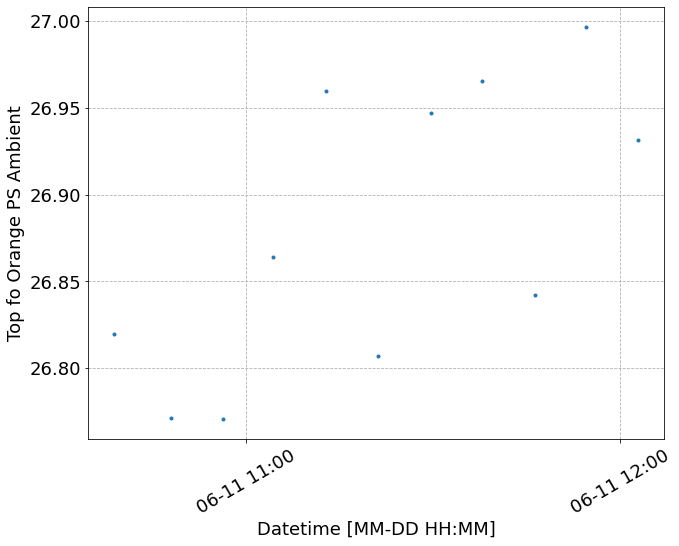

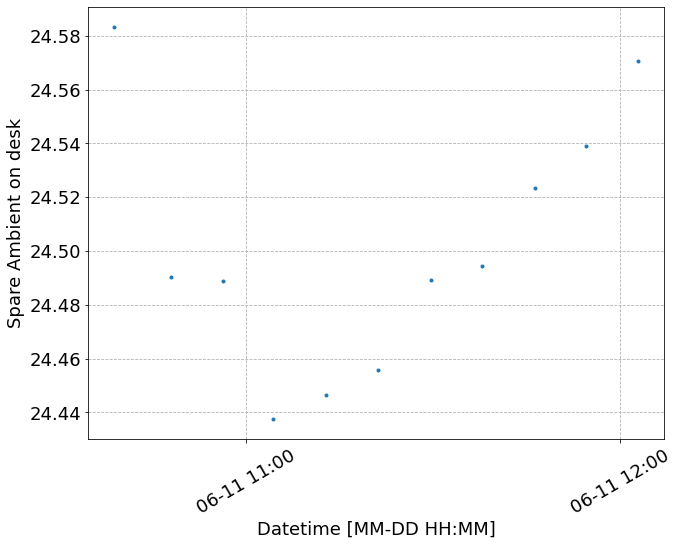

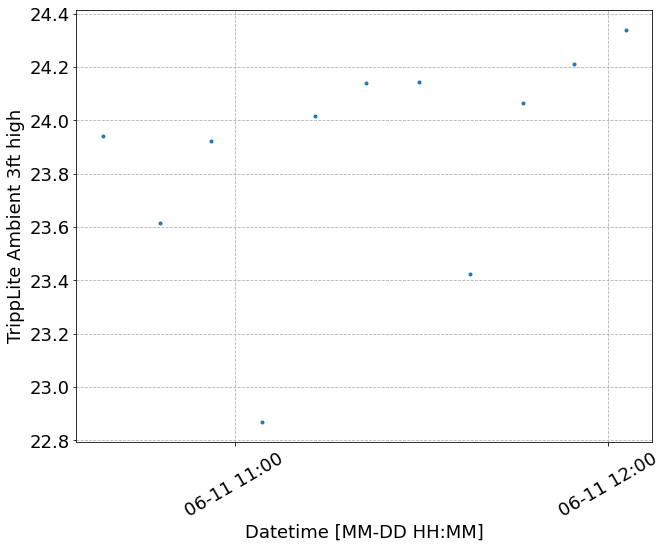

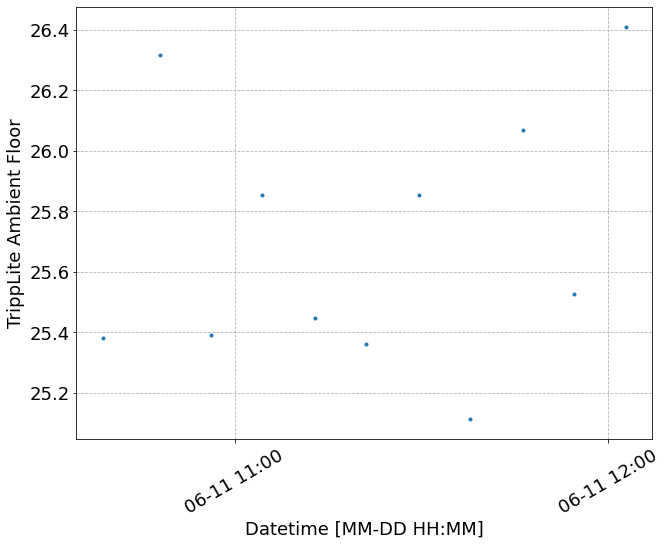

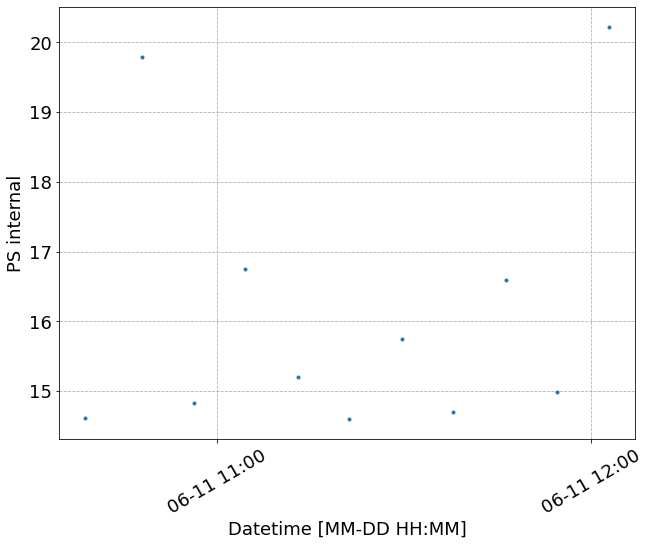

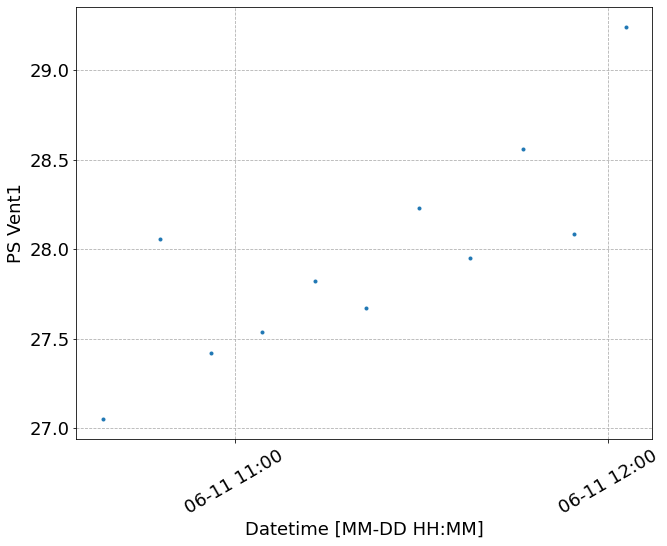

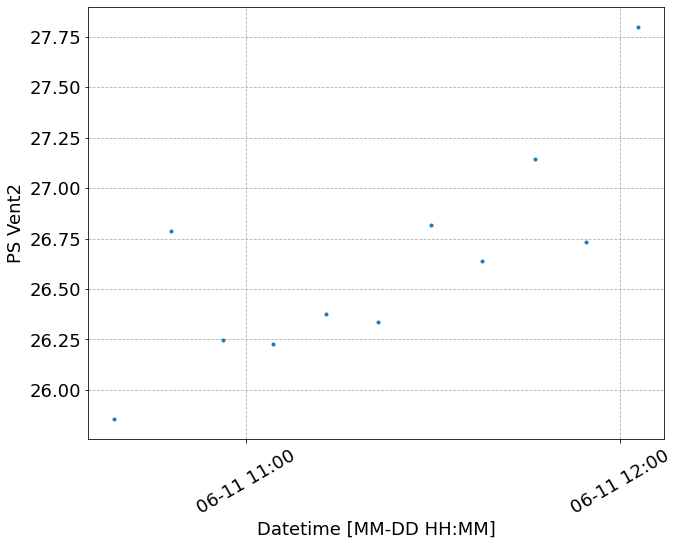

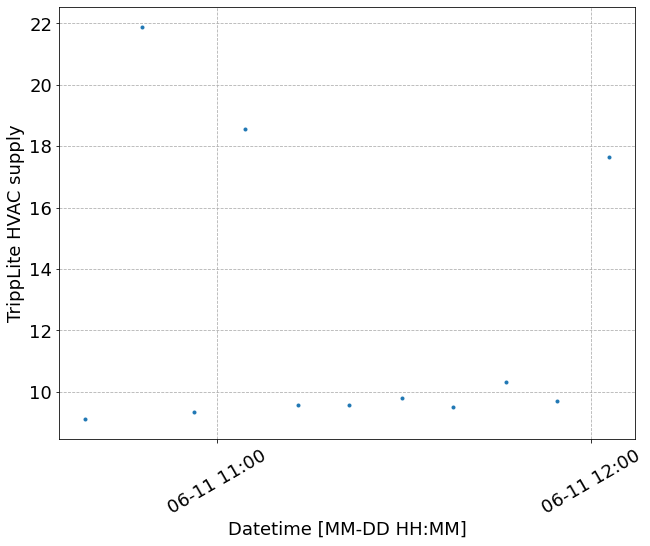

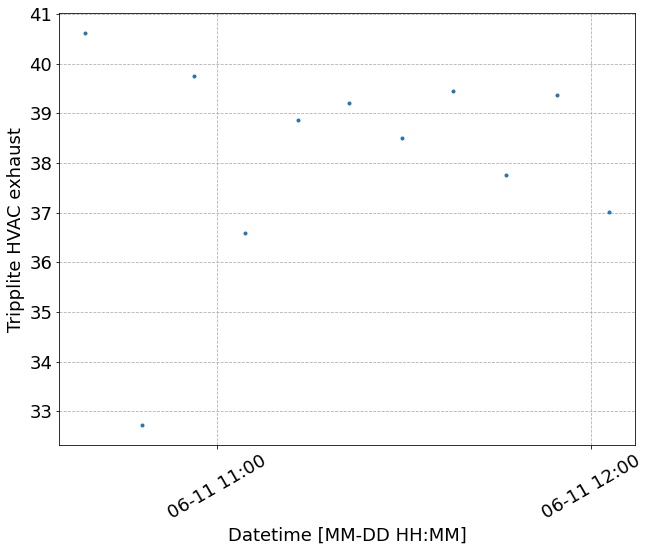

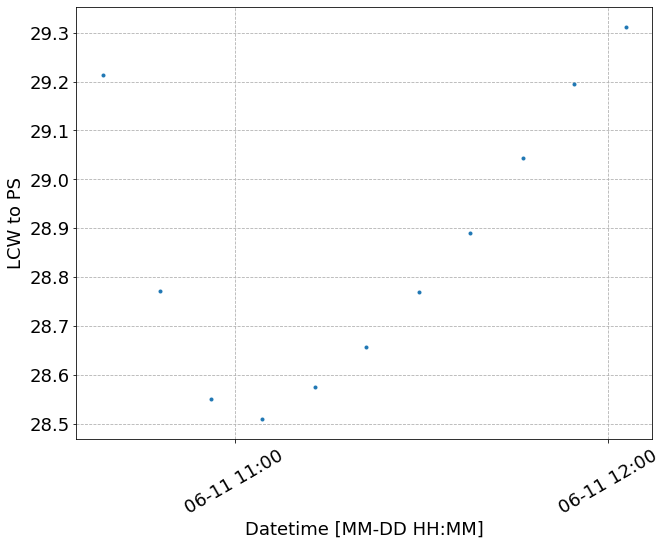

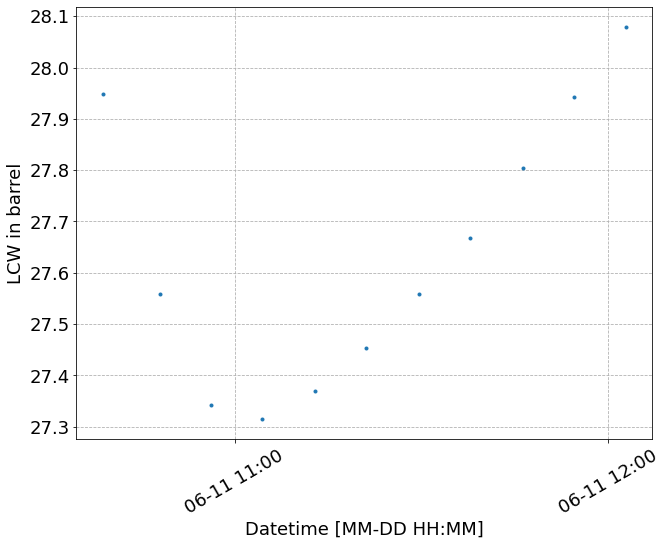

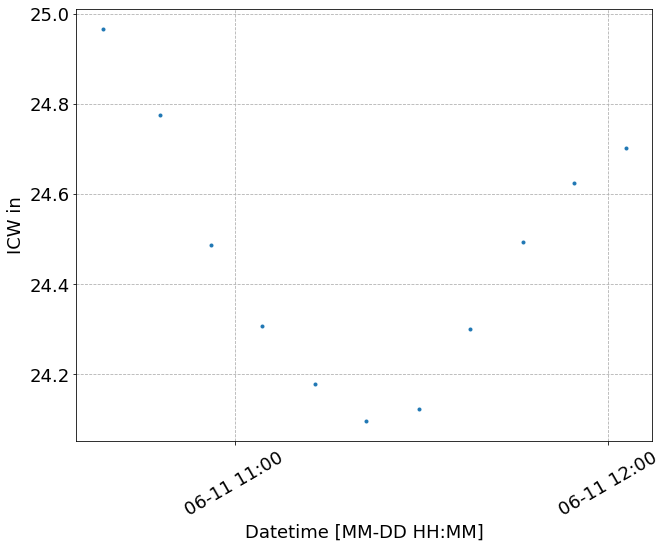

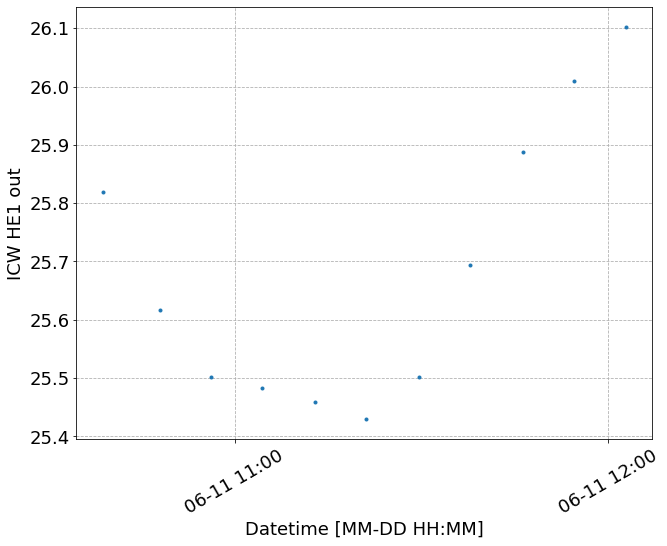

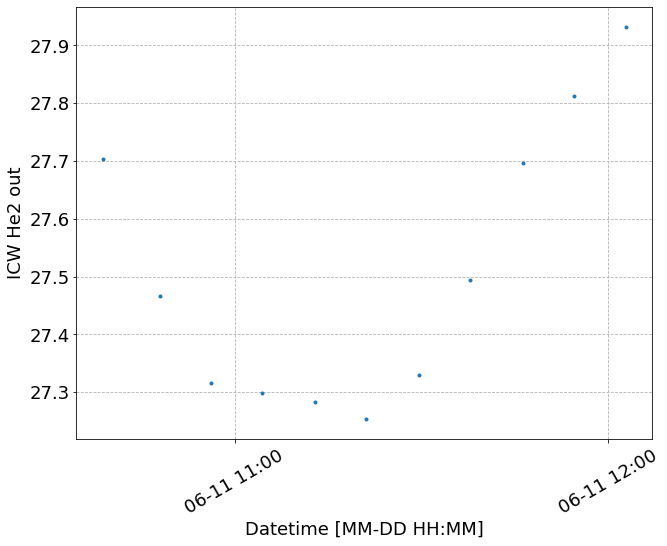

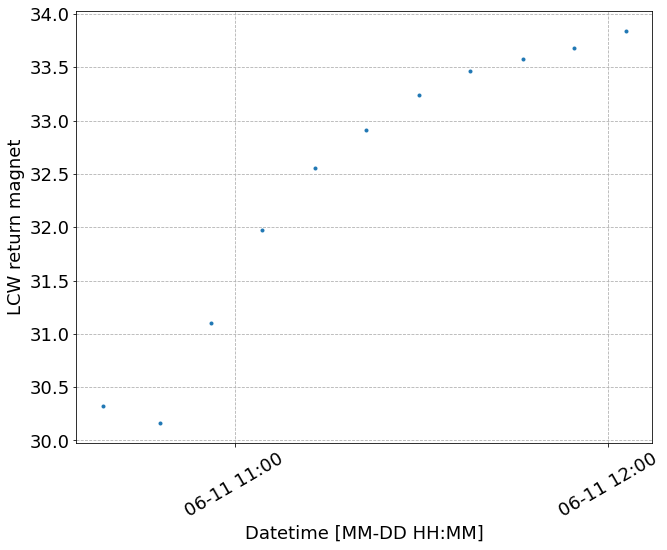

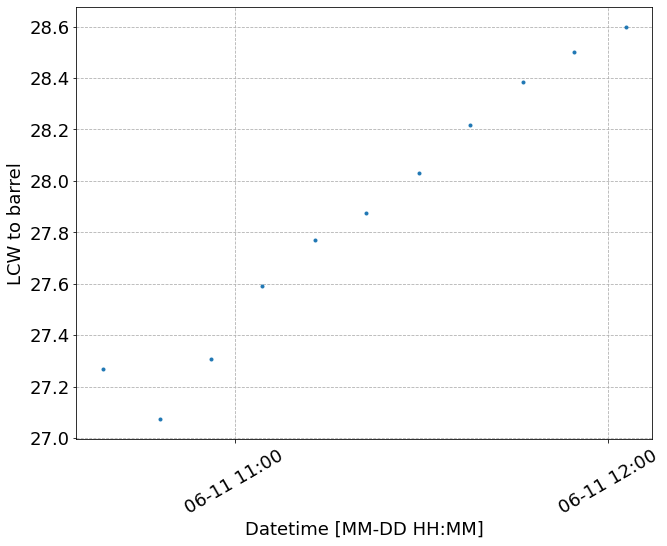

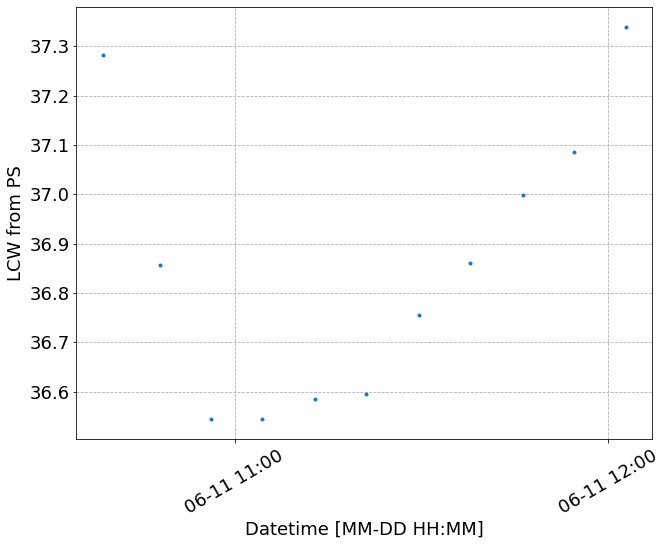

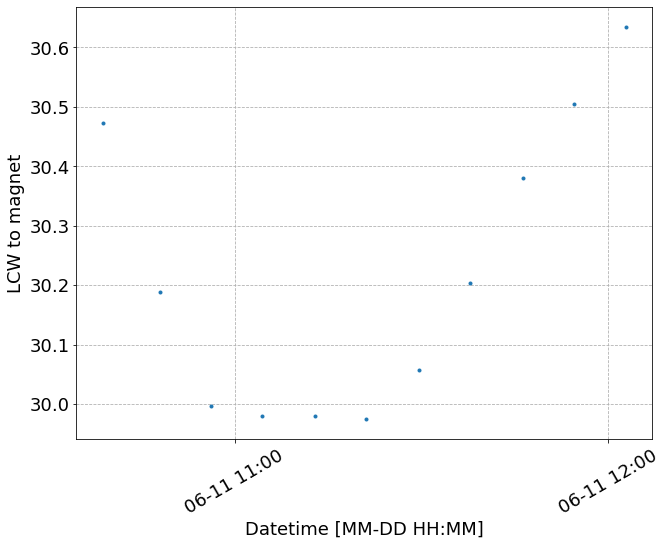

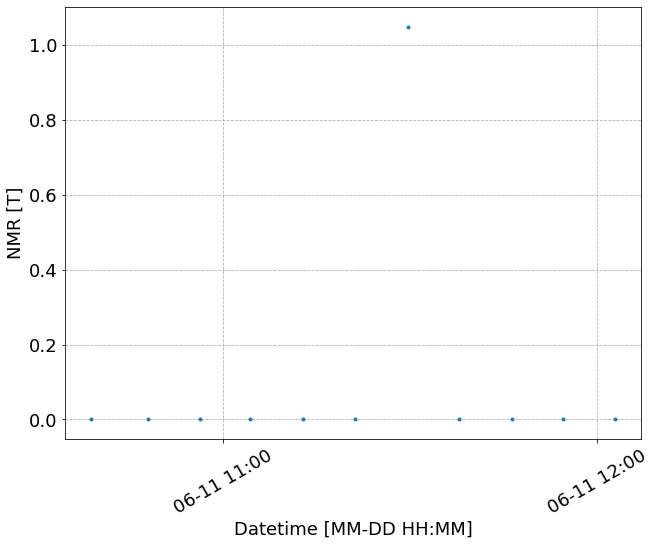

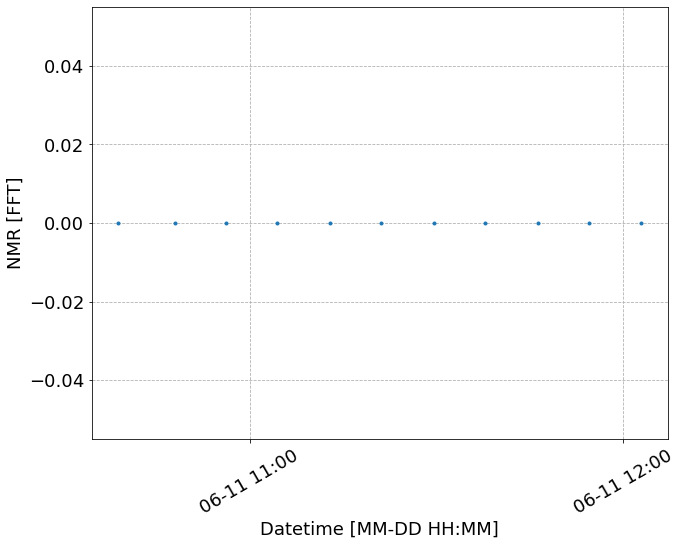

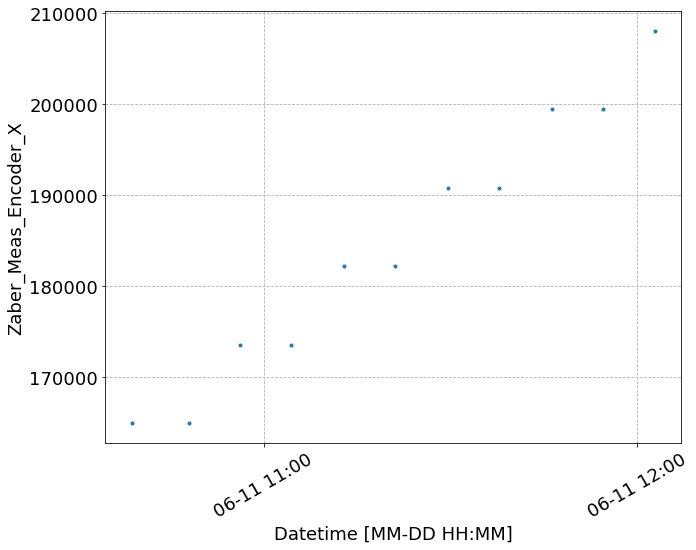

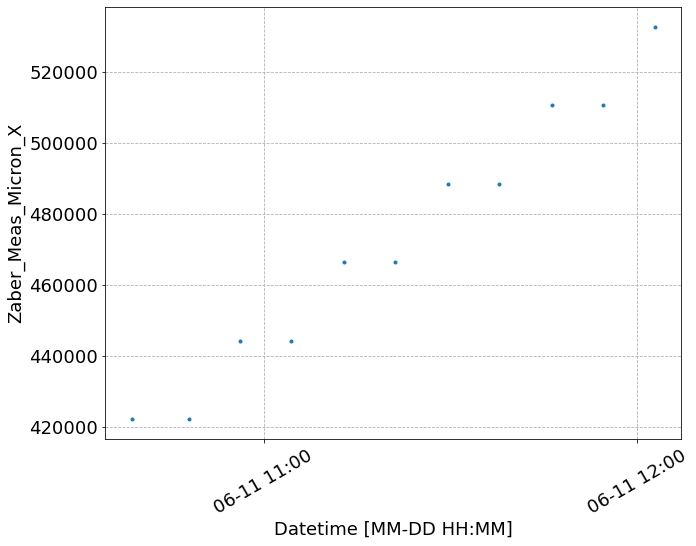

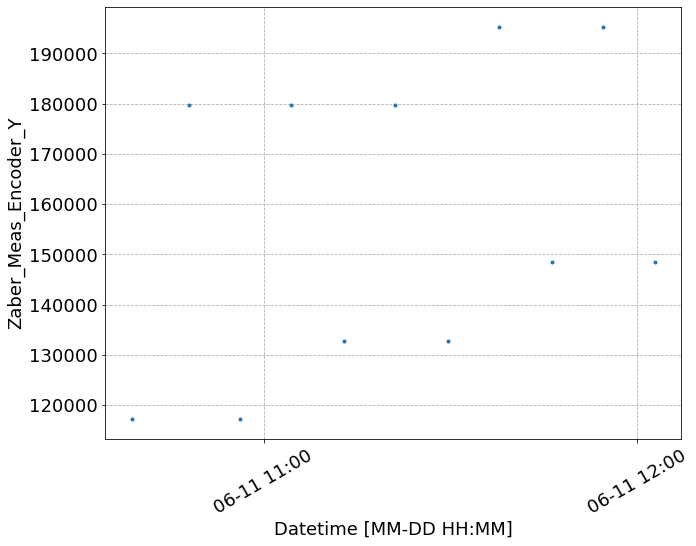

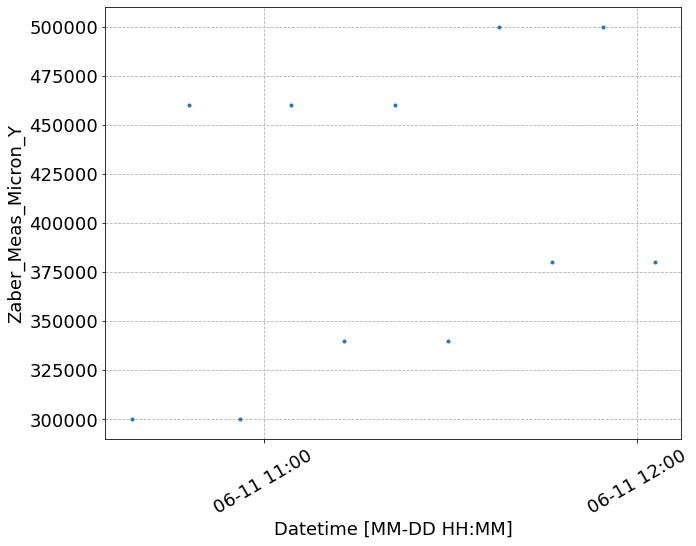

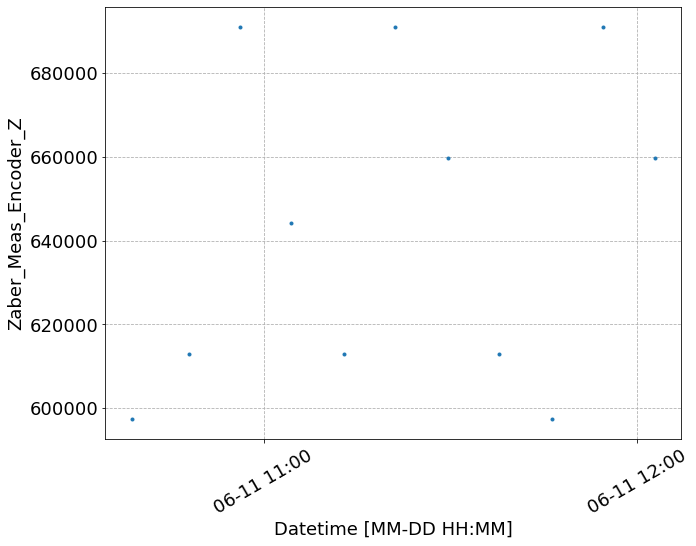

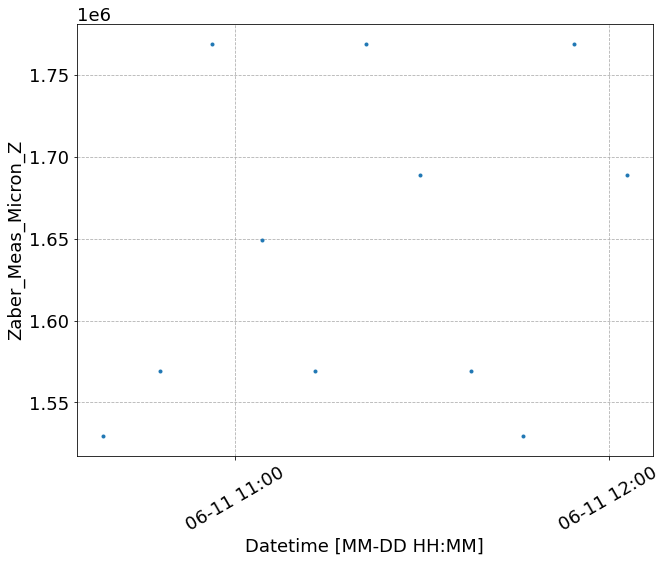

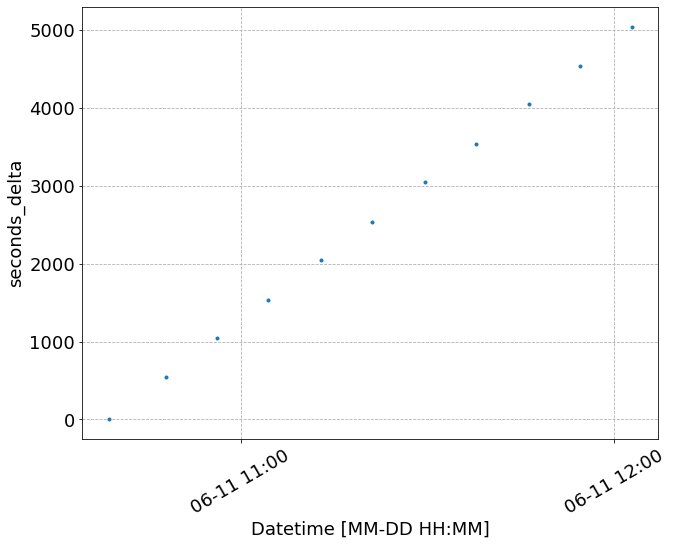

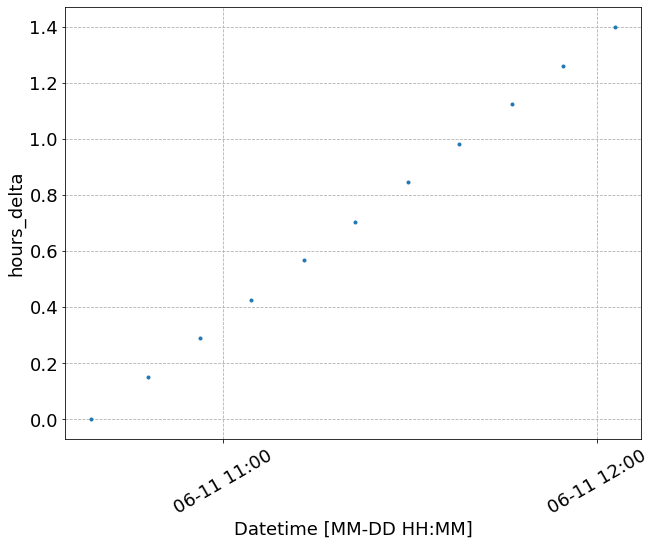

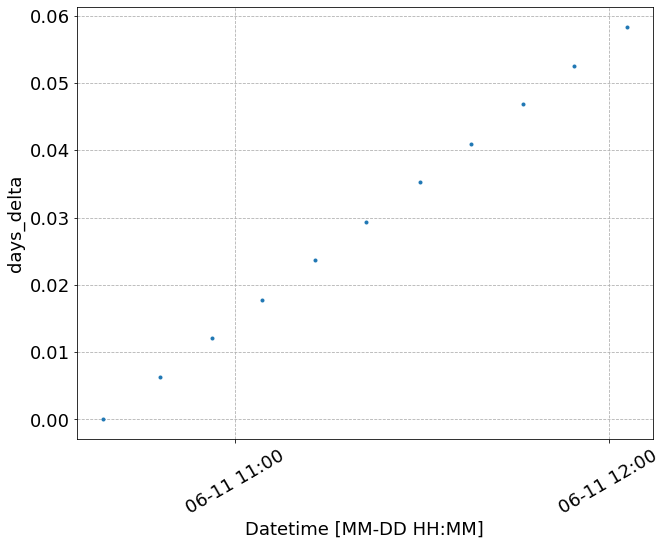

In [195]:
for ycol in df_slow.columns:
    #print(ycol)
    if is_numeric_dtype(df_slow[ycol]):
        #print('Plotting...')
        fig, ax = plot_y_vs_time(df_slow, ycol, 3, plotfile=plotdir_slow+f'time/{ycol}_vs_Datetime')

# Useful Functions

In [196]:
[(df[f"Zaber_Meas_Micron_{i}"].max() - df[f"Zaber_Meas_Micron_{i}"].min()) * 1e-3 for i in ['X', 'Y', 'Z']]

[43.1640625, 93.75, 93.75]

In [197]:
df["Zaber_Meas_Micron_X"].unique()

array([164917.96875, 173550.78125, 182183.59375, 190816.40625,
       199449.21875, 208082.03125])

In [198]:
df.tail()

,Time,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Micron_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Micron_Y,Zaber_Meas_Encoder_Z,Zaber_Meas_Micron_Z,seconds_delta,hours_delta,days_delta
Datetime,,,,,,,,,,,,,,,,,
2021-06-11 12:07:43,6/11/2021 12:07:43 PM,192.052797,24.303450,1.049591,0.0,532690.0,460000.0,1729210.0,532690.0,208082.03125,460000.0,179687.5,1729210.0,675472.65625,5306.0,1.473889,0.061412
2021-06-11 12:07:58,6/11/2021 12:07:58 PM,192.052740,24.303717,0.000000,0.0,532690.0,460000.0,1769210.0,532690.0,208082.03125,460000.0,179687.5,1769210.0,691097.65625,5321.0,1.478056,0.061586
2021-06-11 12:08:29,6/11/2021 12:08:29 PM,192.052910,24.304283,0.000000,0.0,532690.0,500000.0,1529210.0,532690.0,208082.03125,500000.0,195312.5,1529210.0,597347.65625,5352.0,1.486667,0.061944
2021-06-11 12:08:45,6/11/2021 12:08:45 PM,192.052797,24.304550,0.000000,0.0,532690.0,500000.0,1569210.0,532690.0,208082.03125,500000.0,195312.5,1569210.0,612972.65625,5368.0,1.491111,0.062130
2021-06-11 12:09:00,6/11/2021 12:09:00 PM,192.052740,24.304833,0.000000,0.0,532690.0,500000.0,1609210.0,532690.0,208082.03125,500000.0,195312.5,1609210.0,628597.65625,5383.0,1.495278,0.062303


In [207]:
len(df)

283

In [208]:
7*7*7

343

In [210]:
# percent complete
len(df) / (7*7*7)

0.8250728862973761

In [211]:
# percent remaining
1 - len(df) / (7*7*7)

0.17492711370262393

In [216]:
# time elapsed
(df.index[-1] - df.index[0])

Timedelta('0 days 01:29:43')

In [213]:
# time to complete
(df.index[-1] - df.index[0]) * 0.1749

Timedelta('0 days 00:15:41.486700')

In [214]:
# completion time
(df.index[-1] - df.index[0]) * 0.1749 + df.index[-1]

Timestamp('2021-06-11 12:24:41.486700')

In [215]:
6*6*6

216

# Zaber Coordinates
- Set with reference to hand measurements of brass locations

In [238]:
Zaber_ADC_lims = {'X':[422190, 554838], 'Y':[201704, 637825], 'Z': [-1783025, -1442393]}

In [219]:
# ASSUMES NEW NAMING CONVENTION
# ADC / micron
ADC_per_micron_XYZ = np.array([(df[f"Zaber_Meas_Encoder_{i}"].max() - df[f"Zaber_Meas_Encoder_{i}"].min()) * 1e-3 for i in ['X', 'Y', 'Z']])\
/np.array([(df[f"Zaber_Meas_Micron_{i}"].max() - df[f"Zaber_Meas_Micron_{i}"].min()) * 1e-3 for i in ['X', 'Y', 'Z']])

In [220]:
ADC_per_micron_XYZ

array([2.56, 2.56, 2.56])

In [223]:
ADC_per_micron = ADC_per_micron_XYZ[0]
micron_per_ADC = 1/ADC_per_micron

In [224]:
ADC_per_mm = ADC_per_micron * 1e3 # 1e3 micron / mm
mm_per_ADC = 1/ADC_per_mm

In [226]:
mm_per_ADC, ADC_per_mm

(0.000390625, 2560.0)

In [232]:
ref_ADCS = {i: sf*df[f'Zaber_Pattern_{i}'].min() for i, sf in zip(['X', 'Y', 'Z'], [1, 1, -1])}
ref_mm = {i: sf*df[f'Zaber_Meas_Micron_{i}'].min() for i, sf in zip(['X', 'Y', 'Z'], [1e-3, 1e-3, -1e-3])}

In [244]:
ref_ADCS, ref_mm

({'X': 422190.0, 'Y': 300000.0, 'Z': -1529210.0},
 {'X': 164.91796875, 'Y': 117.1875, 'Z': -597.34765625})

In [242]:
mm_at_lims = {}
for i in ref_ADCS.keys():
    delta_ADC = ref_ADCS[i] - Zaber_ADC_lims[i][0]
    delta_mm = delta_ADC * mm_per_ADC
    mm_at_lims[i] = ref_mm[i] - delta_mm

In [240]:
delta_ADC

253815.0

In [241]:
delta_ADC * mm_per_ADC

99.146484375

In [243]:
mm_at_lims

{'X': 164.91796875, 'Y': 78.790625, 'Z': -696.494140625}

In [245]:
spacer_R = 19.33/2 # mm

In [246]:
spacer_centers = {'X': [0, 0 , 0], 'Y': [51.+spacer_R, 136.+spacer_R, 226.+spacer_R], 'Z': [50., 230.+spacer_R, 47.]}

In [247]:
spacer_centers

{'X': [0, 0, 0], 'Y': [60.665, 145.665, 235.665], 'Z': [50.0, 239.665, 47.0]}

In [255]:
3/32 # inch above brass

0.09375

In [256]:
3/32 * 25.4 # mm above brass (25.4 mm/inch)

2.3812499999999996

In [261]:
xwidth = 30.1 - 18.2  # mm ESTIMATED!!! PLEASE MEASURE
xwidth

11.900000000000002

In [262]:
xoff = xwidth - 2 # mm, accounts for NMR sample depth

In [263]:
xoff

9.900000000000002

In [264]:
# NEED EXTRA X OFFSET FOR OFFSET FROM POLE?

In [265]:
offset_AL = {'X': xoff, 'Y': 0., 'Z': 12.73+3/32 * 25.4} # NEED TO MEASURE X

In [368]:
# conversion
def zaber_mm_to_mag_mm(zaber_mm, coord):
    return zaber_mm - (mm_at_lims[coord] - offset_AL[coord] - spacer_centers[coord][0])

def mag_mm_to_zaber_mm(mag_mm, coord):
    return mag_mm + (mm_at_lims[coord] - offset_AL[coord] - spacer_centers[coord][0])

def zaber_mm_to_zaber_ADC(zaber_mm, coord):
    delta_mm = zaber_mm - mm_at_lims[coord]
    delta_ADC = delta_mm * ADC_per_mm
    return ADC_at_lims[coord] + delta_ADC

def zaber_ADC_to_zaber_mm(zaber_ADC, coord):
    delta_ADC = zaber_ADC - ADC_at_lims[coord]
    delta_mm = delta_ADC * mm_per_ADC
    return mm_at_lims[coord] + delta_mm

In [363]:
[zaber_mm_to_zaber_ADC(ref_mm[i], i) for i in ['X', 'Y','Z']]

[422190.0, 300000.0, -1529210.0]

In [359]:
ref_ADCS

{'X': 422190.0, 'Y': 300000.0, 'Z': -1529210.0}

In [364]:
mag_mm_to_zaber_mm(125, 'Y')

143.125625

In [365]:
mag_mm_to_zaber_mm(125, 'Z')

-636.605390625

In [385]:
y0 = round(zaber_mm_to_zaber_ADC(mag_mm_to_zaber_mm(125, 'Y'), 'Y'))
y0

366402

In [387]:
z0 = round(zaber_mm_to_zaber_ADC(mag_mm_to_zaber_mm(125, 'Z'), 'Z'))
z0

-1629710

In [392]:
132600/ADC_per_mm

51.796875

In [378]:
ADC_per_mm * 5

12800.0

In [391]:
ADC_per_mm*10

25600.0

In [381]:
ADC_per_mm

2560.0

In [396]:
mm_per_ADC

0.000390625

In [394]:
# X
mm_per_ADC*30177

11.787890625000001

In [395]:
# Z
mm_per_ADC*64950

25.37109375

In [397]:
# Y
mm_per_ADC*443495

173.240234375

In [398]:
ADC_per_mm

2560.0

In [389]:
z0 + ADC_per_mm * 5, z0 - ADC_per_mm * 5

(-1616910.0, -1642510.0)

In [390]:
y0 - ADC_per_mm * 5, y0 + ADC_per_mm * 5

(353602.0, 379202.0)

In [ ]:
# 9 steps y, 9 steps z

In [369]:
zaber_ADC_to_zaber_mm(-1629710, 'Z')

-636.60546875

In [370]:
zaber_mm_to_mag_mm(zaber_ADC_to_zaber_mm(-1629710, 'Z'), 'Z')

124.99992187500004

In [371]:
zaber_ADC_to_zaber_mm(366402, 'Y')

143.12578125

In [372]:
zaber_mm_to_mag_mm(zaber_ADC_to_zaber_mm(366402, 'Y'), 'Y')

125.00015624999997

In [373]:
# middle X
zaber_mm_to_zaber_ADC(mag_mm_to_zaber_mm(37.5, 'X'), 'X')

492846.0

In [379]:
## DIFFERENCE IN Y, Z BETWEEN RUN 1 & RUN 2
loc1 = np.array([161.6, 101.76])
loc2 = np.array([125., 125.])

In [380]:
np.linalg.norm(loc1-loc2)

43.35501816399111

In [ ]:
a

In [346]:
mm_at_lims

{'X': 164.91796875, 'Y': 78.790625, 'Z': -696.494140625}

In [352]:
ADC_at_lims = {i: Zaber_ADC_lims[i][0] for i in ['X', 'Y', 'Z']}

In [353]:
ADC_at_lims

{'X': 422190, 'Y': 201704, 'Z': -1783025}

In [347]:
Zaber_ADC_lims

{'X': [422190, 554838], 'Y': [201704, 637825], 'Z': [-1783025, -1442393]}

In [267]:
zaber_mm_to_mag_mm(164.92, 'X')

9.902031249999993

In [252]:
mm_at_lims['Y'], spacer_centers['Y'][0]

(78.790625, 60.665)

In [260]:
# convert in dataframe

In [282]:
df['Magnet_X_mm'] = np.array([zaber_mm_to_mag_mm(x, 'X') for x in 1e-3*df['Zaber_Meas_Micron_X'].values])
df['Magnet_Y_mm'] = np.array([zaber_mm_to_mag_mm(y, 'Y') for y in 1e-3*df['Zaber_Meas_Micron_Y'].values])
df['Magnet_Z_mm'] = np.array([zaber_mm_to_mag_mm(z, 'Z') for z in -1e-3*df['Zaber_Meas_Micron_Z'].values])

In [291]:
df['Magnet_Z_mm'].unique()

array([164.25773438, 148.63273438, 133.00773438, 117.38273438,
       101.75773438,  86.13273438,  70.50773438])

In [307]:
def plot_xplane_v2(df, xval, coord_lab='Magnet', plotfile=None):
#     mm = 'Encoder' # old
    #mm = 'Micron' # new
#     xmin = df[f'{coord_lab}_X'].min()
    df_ = df.query(f'`Zaber_Pattern_X` == {xval}').copy()
    x_mm = df_[f'{coord_lab}_X_mm'].values[0]
    ymin = df[f'{coord_lab}_Y_mm'].min()
    ymax = df[f'{coord_lab}_Y_mm'].max()
    zmin = df[f'{coord_lab}_Z_mm'].min()
    zmax = df[f'{coord_lab}_Z_mm'].max()
#     zmin = -df_[f'{coord_lab}_Z'].max()
    # plot
    fig, ax = plt.subplots()
    sc = ax.scatter((df_[f'{coord_lab}_Y_mm']), (df_[f'{coord_lab}_Z_mm']),
                    c=df_['NMR [T]'], s=25)
    cb = fig.colorbar(sc, label='NMR [T]')
    ax.set_xlabel('Zaber Y [mm]')
    ax.set_ylabel('Zaber Z [mm]')
    fig.suptitle(f'Zaber X = {x_mm:.2f} [mm] = {xval} [ADC]')
#     fig.suptitle(f'Zaber Encoder X = {xval} [ADC]')
    #ax.set_facecolor('white')
    ax.set_xlim([ymin-5, ymax+5])
    ax.set_ylim([zmin-5, zmax+5])
    
    if not plotfile is None:
        fig.savefig(plotfile+'.pdf', facecolor='white', transparent=False)
        fig.savefig(plotfile+'.png', facecolor='white', transparent=False)
    return fig, ax

In [311]:
df['Zaber_Pattern_Y'].unique()[-3]

460000.0

In [313]:
df.query('`Zaber_Pattern_Y` == 460000.0')['Zaber_Meas_Micron_Y'].iloc[0]

179687.5

In [315]:
zaber_mm_to_mag_mm(179687.5*1e-3, 'Y')

161.561875

In [ ]:
####

In [318]:
df['Zaber_Pattern_Z'].unique()[-3]

1689210.0

In [319]:
df.query('`Zaber_Pattern_Z` == 1689210.0')['Zaber_Meas_Micron_Z'].iloc[0]

659847.65625

In [321]:
zaber_mm_to_mag_mm(-659847.65625*1e-3, 'Z')

101.75773437500004

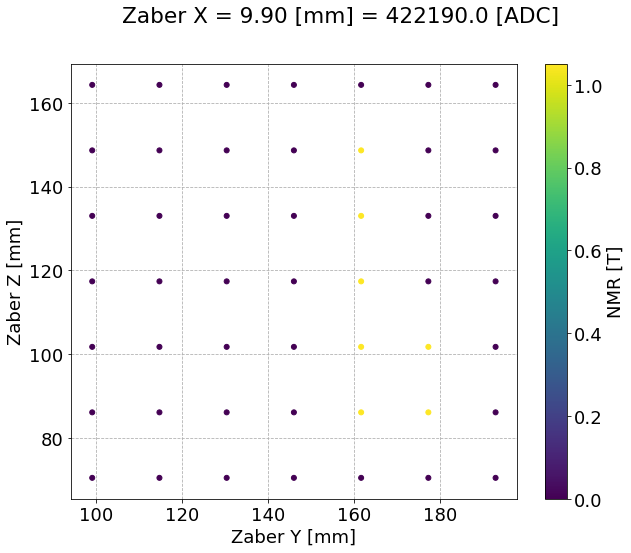

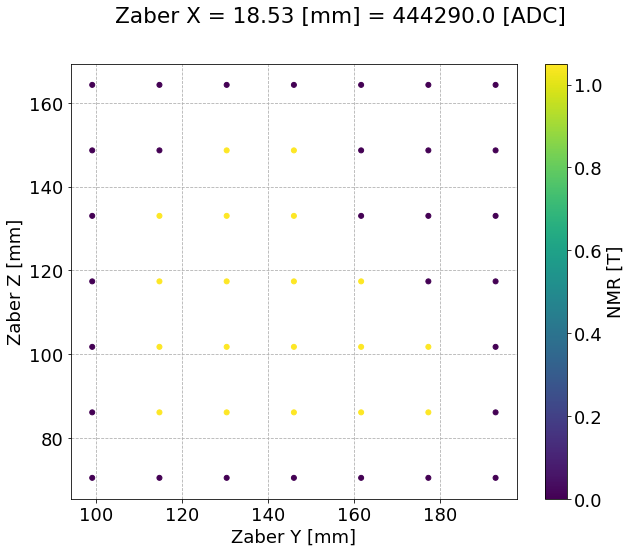

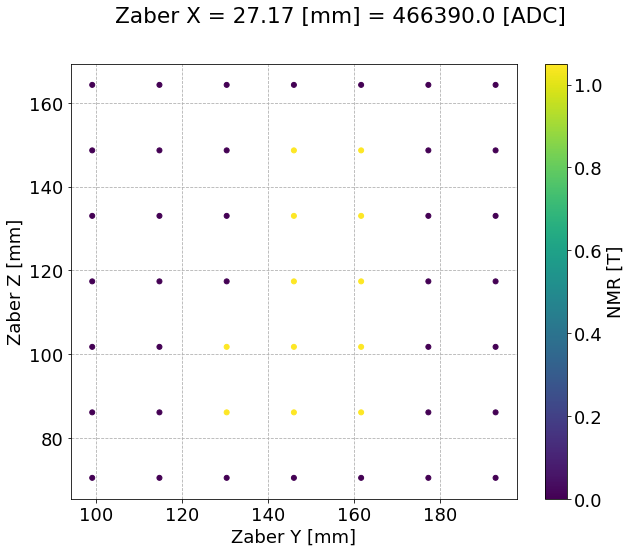

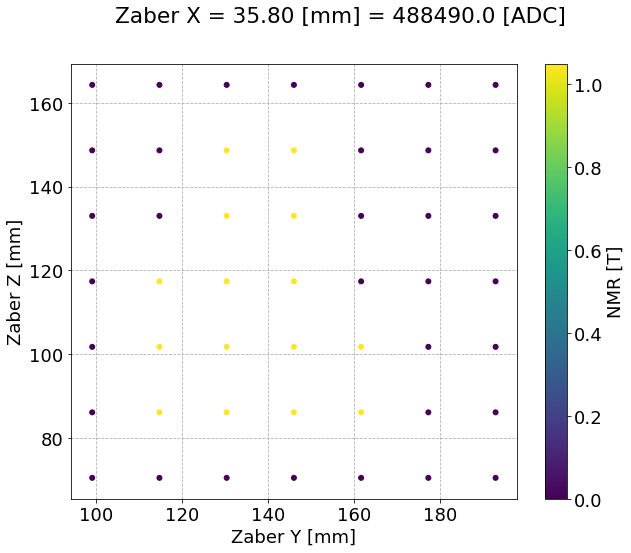

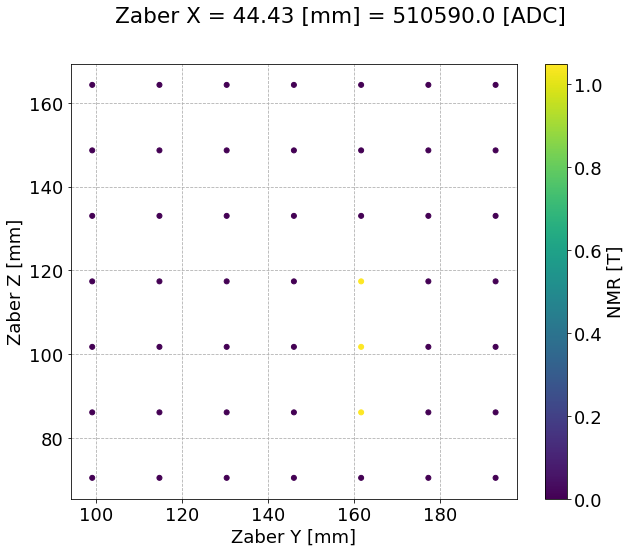

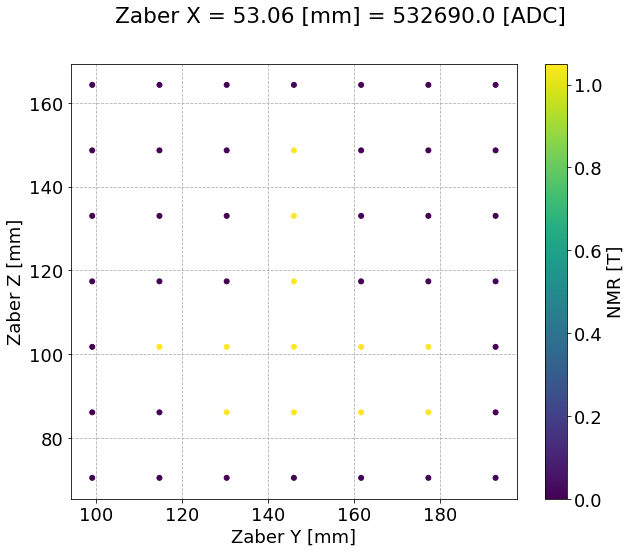

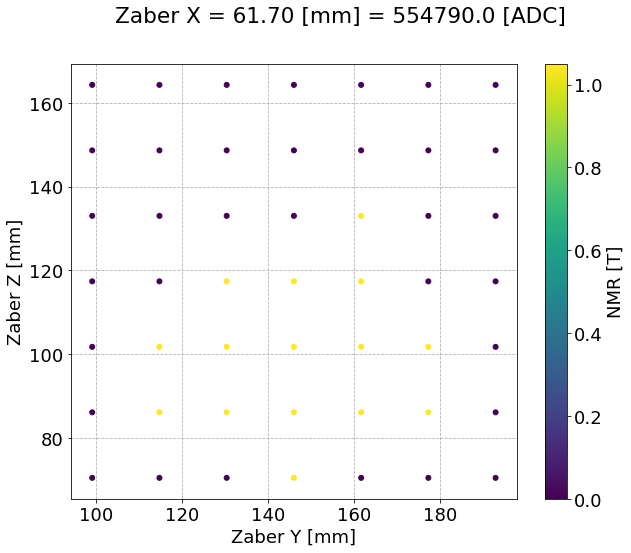

In [305]:
for xval in df['Zaber_Pattern_X'].unique():
    fig, ax = plot_xplane_v2(df, xval, plotfile=f'{plotdir_pattern}xslices/magnet-coord_NMR_vs_Z_vs_Y_{int(xval):d}')

In [298]:
df[df['NMR [T]'] > 0.7]

,Time,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Micron_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Micron_Y,Zaber_Meas_Encoder_Z,Zaber_Meas_Micron_Z,seconds_delta,hours_delta,days_delta,Magnet_X_mm,Magnet_Y_mm,Magnet_Z_mm
Datetime,,,,,,,,,,,,,,,,,,,,
2021-06-11 10:48:11,6/11/2021 10:48:11 AM,192.053477,24.068517,1.050127,0.0,422190.0,460000.0,1569210.0,422190.0,164917.96875,460000.0,179687.5,1569210.0,612972.65625,534.0,0.148333,0.006181,9.900000,161.561875,148.632734
2021-06-11 10:48:27,6/11/2021 10:48:27 AM,192.053420,24.073317,1.050010,0.0,422190.0,460000.0,1609210.0,422190.0,164917.96875,460000.0,179687.5,1609210.0,628597.65625,550.0,0.152778,0.006366,9.900000,161.561875,133.007734
2021-06-11 10:48:43,6/11/2021 10:48:43 AM,192.053420,24.078067,1.049981,0.0,422190.0,460000.0,1649210.0,422190.0,164917.96875,460000.0,179687.5,1649210.0,644222.65625,566.0,0.157222,0.006551,9.900000,161.561875,117.382734
2021-06-11 10:48:59,6/11/2021 10:48:59 AM,192.053420,24.082433,1.049994,0.0,422190.0,460000.0,1689210.0,422190.0,164917.96875,460000.0,179687.5,1689210.0,659847.65625,582.0,0.161667,0.006736,9.900000,161.561875,101.757734
2021-06-11 10:49:15,6/11/2021 10:49:15 AM,192.053250,24.086883,1.050145,0.0,422190.0,460000.0,1729210.0,422190.0,164917.96875,460000.0,179687.5,1729210.0,675472.65625,598.0,0.166111,0.006921,9.900000,161.561875,86.132734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-11 12:23:25,6/11/2021 12:23:25 PM,192.053023,24.318067,1.049846,0.0,554790.0,460000.0,1649210.0,554790.0,216714.84375,460000.0,179687.5,1649210.0,644222.65625,6248.0,1.735556,0.072315,61.696875,161.561875,117.382734
2021-06-11 12:23:42,6/11/2021 12:23:42 PM,192.052797,24.318250,1.049854,0.0,554790.0,460000.0,1689210.0,554790.0,216714.84375,460000.0,179687.5,1689210.0,659847.65625,6265.0,1.740278,0.072512,61.696875,161.561875,101.757734
2021-06-11 12:23:58,6/11/2021 12:23:58 PM,192.052797,24.318433,1.049871,0.0,554790.0,460000.0,1729210.0,554790.0,216714.84375,460000.0,179687.5,1729210.0,675472.65625,6281.0,1.744722,0.072697,61.696875,161.561875,86.132734


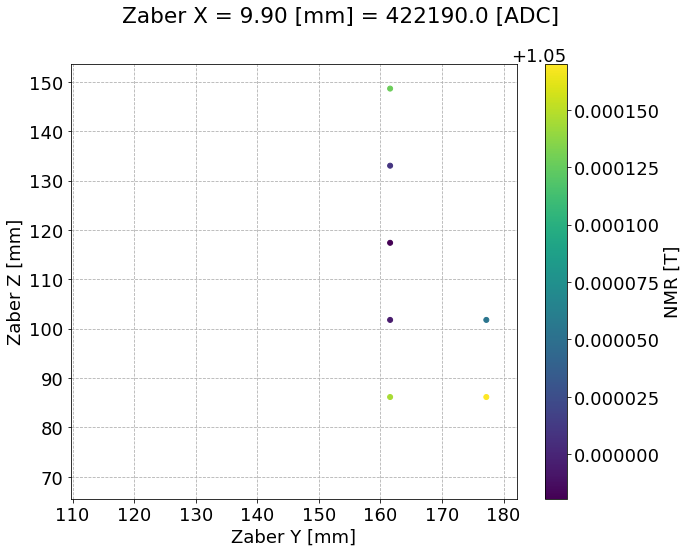

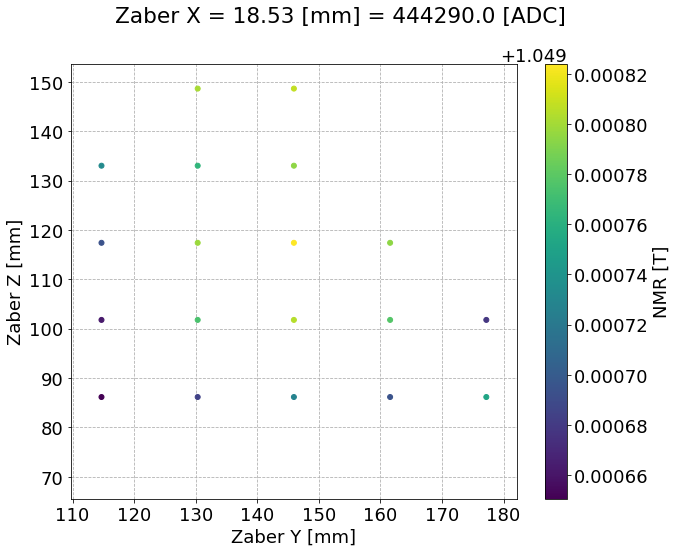

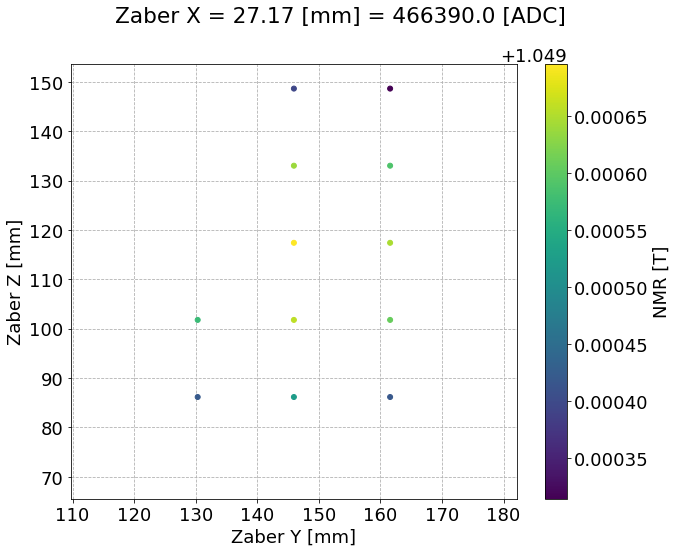

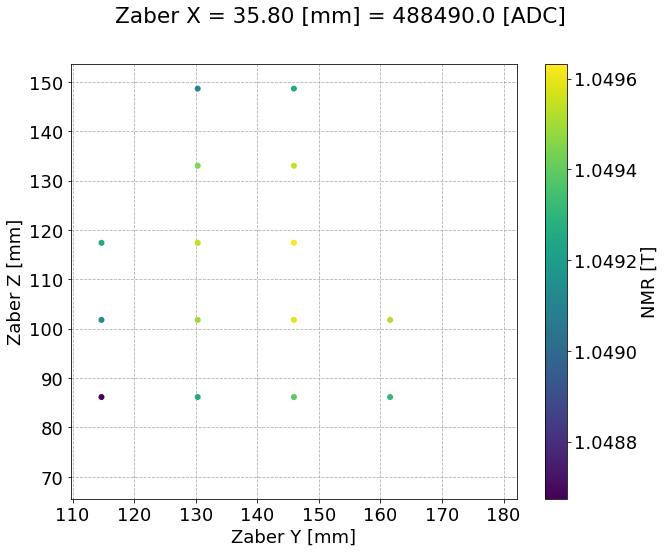

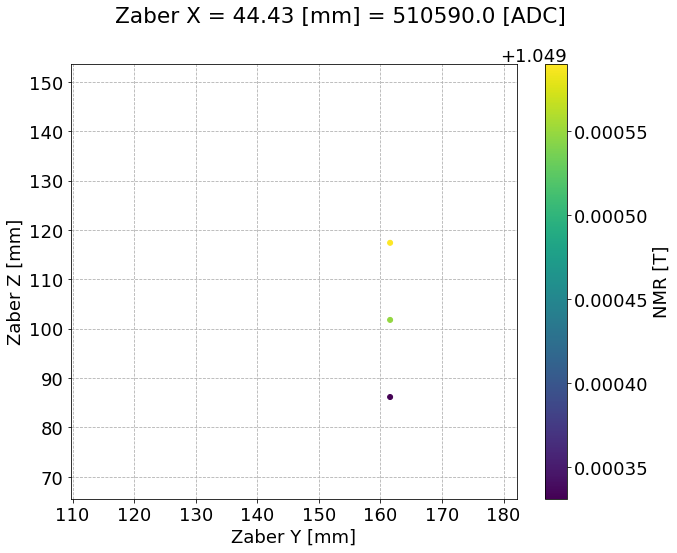

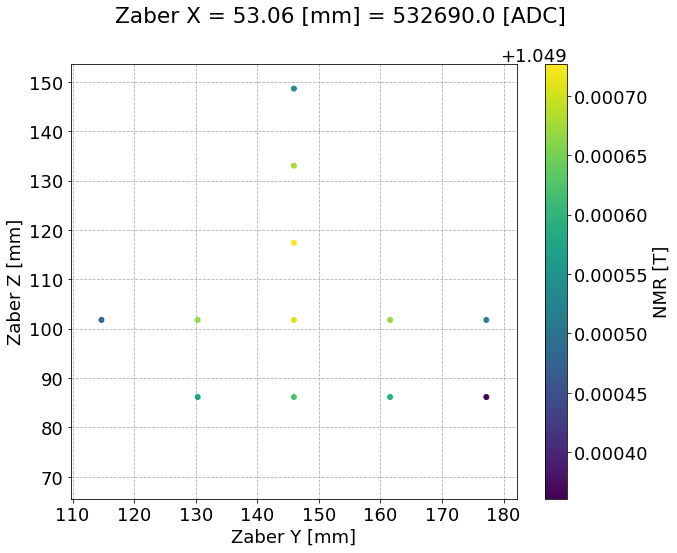

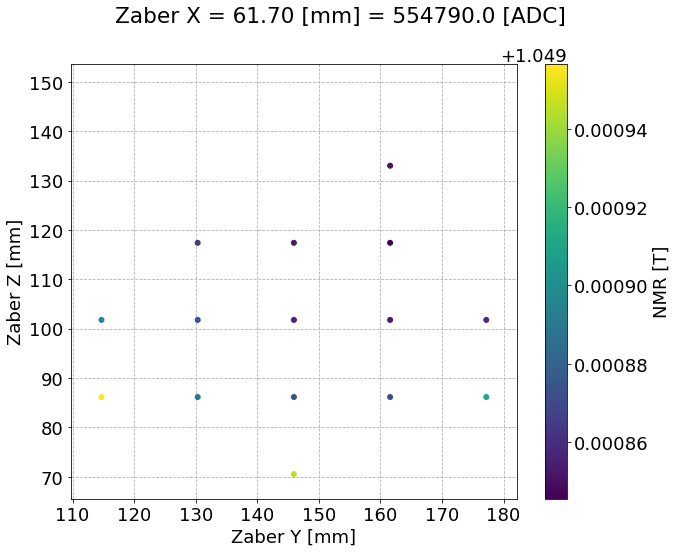

In [308]:
df_ = df[df['NMR [T]'] > 0.7]
for xval in df_['Zaber_Pattern_X'].unique():
    fig, ax = plot_xplane_v2(df_, xval, plotfile=f'{plotdir_pattern}xslices/magnet-coord_NMR-meas_vs_Z_vs_Y_{int(xval):d}')

In [322]:
df['Magnet_X_mm'].describe()

count    343.000000
mean      35.798437
std       17.290849
min        9.900000
25%       18.532813
50%       35.798438
75%       53.064063
max       61.696875
Name: Magnet_X_mm, dtype: float64

In [323]:
61.697-9.9

51.797000000000004

In [324]:
75-61.697

13.302999999999997

In [325]:
9.9

9.9

In [327]:
51.797 / 1

51.797

In [331]:
51*17 / 60

14.45

In [332]:
101*17/60

28.616666666666667

In [334]:
518*17/60 / 60

2.446111111111111

In [335]:
zaber_mm_to_mag_mm(192., 'X')

36.982031250000006

In [336]:
zaber_mm_to_mag_mm(193., 'X')

37.982031250000006